# 1. Documentation

**Author**: &nbsp; Navavat, pnastranagant@gmail.com

**Last modified**: &nbsp; 2022-12-07

**Changelog**:

  - upgrade to v. 2.5.2: export area as csv

****

## 1.1. Description#

### 1.1.1. Overview
 This notebook is available for processing results from GC-MS. It is aligned as sequential executiton as followings sections,

  1. **Documentation**: Provide description and user guide.
  2. **Environmental Setup***: Contain neccessary configuration.
  3. **Define Functions**: Contain neccessary functions.
  4. **Execute main function***: Provide results.

### 1.1.2. Control Version

To use this notebook, it is neccessary to avoid replacing the original version. Therefore, user can have own notebook by selecting:

    File -> Save a copy in Drive 



### 1.1.3. Essential Python language knowledge

User is encouraged to have some of basic syntax of Python language to use this notebook efficiently. The essential parts are,

- Basic syntax of data types:
  
      a) int   <==> 0, 1, 2, 10, 100
      b) float <==> 0.0, 1.0, 2.22, 10.9, 100.6
      c) str   <==> 'This value is string', '0 is also string'
      d) list  <==> [-0.1, 5.2], ['value_1', 'value_2']
      e) tuple <==> (-0.1, 5.2), ('value_1', 'value_2')
      f) dict  <==> {-0.1:5.2}, {'key_1', 'value_2'}
  
  For more information, see Built-in types (https://docs.python.org/3/library/stdtypes.html).


- Basic syntax of variable declaration :
  
      VARIABLE = VALUE 
  
  For more information, see Programming FAQ (https://docs.python.org/3/faq/programming.html).

- Comment syntax: Commenting is one of the smart way to leave something in notebook but do not want it to be executed. To ignore something, user can comment by adding symbol: #, in front of code as,

      THIS CODE WILL BE EXEECUTED

      # THIS CODE WILL BE IGNORED

### 1.1.4. Essential Tools

Apart from GC-MS system, there are 2 tools are required for using this notebook:

- Web browser: To open this notebook. Unfortunately, it is currently limited in computer (ipad & mobile phone cannot open this).
- Microsoft Excel (MS Excel) liked software: To prepare sample file. For more information of file preparation, see section: **1.2.2. Sample File Preparation**
- Internet connection

****

## 1.2. User guide

### 1.2.1. How to use

User can process GC-MS results via 4 steps,

1. **Prepare data**: According to the **GC-MS Data Analysis software** generates non-machine readable format (even it is CSV format), it is neccessary to prepare file for machine readable format. See section: **1.2.3. File Preparation**

2. **Set configurations**: It is neccessary to set user own information for processing. Information of such 
  
  - **paths**, **Sample data**,
  - **Reference data** (optional),
  - **Contamination** (optional),
  - **Options**,
  
  are available for setting. See **Edit** in section: **1.2.2. Edit, Save, and Run notebook**, and section: **2.2. Configuration Setup (for user)**

3. **Connect Google Drive**: This notebook requires authorization to access data for loading and saving. See **Fresh run** in section: **1.2.2. Edit, Save, and Run notebook**

4. **Obtain ouputs**: All outputs are provided in section: **4. Execute main function**. Please note that every visualization needs keyword: 

        pass

  to finish plotting. In contrast, if there is a figure configuration needed to change, user just insert as format as,

        CONFIGURARATION : VALUE
  
  In addition, if option: **save** is set to **True**, the notebook will save files and visualizations to destination path (path_to_save). See section: **1.2.5. Visualization**
  There is another interactive cursor for step: **6. Identify case of multiple "Libraries/IDs" but have the same "CAS" number** for choosing **Libraries/IDs**, via insert its order. For instance,

        Found duplicated CAS: 000098-01-1
        Order: 0  <===>  Library/ID: Furfural
        Order: 1  <===>  Library/ID: 2-furan-carboxaldehyde

        Please choose order for using as the representative "Library/ID" for "CAS": 000098-01-1

  If order: **0** was inserted. The notebook will replace all other order with "Furfural". In the same manner, if order: **1** was inserted. The notebook will replace all other order with "2-furan-carboxaldehyde".

**Tips**

    - **reference_dict** is available for optional feature to comparison.

    - **replacing_dict** is available for optional feature to standardization of "Library/ID".

    - **contamination_list** is available for optional feature to exclusion of contamination from processing.

### 1.2.2. Edit, Save, and Run notebook

- **Edit**
  
  This notebook provides editable configuration in section: **2.2. Configuration Setup (for user)**. User can edit follow **Note for configurations** in the section.

  There are 4 types of configurations available for customization:
  
  - Path configuration: Path for data I/O

   - children_path_to_files (type: str): Full path to load the prepared sample files. All of the prepared sample files have to be located in the same folder.

   - children_path_to_save (type: str): Full path to save output files from the processing.

   - children_path_to_ref (type: str): Full path to load reference files (If have).

  - Input configuration: Input data for processing,

   - data_dict (type: dict): A mandatory variable, contains all neccessary information for processing of specimens/samples. It have to be as following format,

        FORMAT:
          data_dict = {
                        0: <====== ID of sample class, must be unique
                          {
                          'class': SAMPLE CLASS,
                          'filenames_replicate': 
                                                [
                                                  REPLICATE FILENAMES
                                                ],
                          'group': SAMPLE GRUOP,
                          'type_for_ref': SAMPLE TYPE,
                          'color_biplot': COLOR
                          }
                      }

       DESCRIPTION:
          - ID of sample class (type: int): 
             must be unique integer for identification of sample class.

          - 'class' (type: str): 
             The class of sample, it will be showned in heatmap and biplot.

          - 'filenames_replicate' (type: list): 
             Filenames (CSV format) of all replicates in the class. All files must contain columns from GC-MS result, i.e.
              a) 'RT'
              b) 'Area Pct'
              c) 'Library/ID'
              d) 'CAS'
              e) 'Qual'
              f) 'Area'

          - 'group' (type: str): 
             Group of this sample, this is not involved in the processing. It is just for notification.

          - 'type_for_ref' (type: str): 
             Type of sample. This affects to grouping in the following steps,
              a) Reference comparison
              b) Heatmap
              c) Biplot

          - 'color_biplot' (type: str): 
             Color to show in biplot. User can assign by color palette
             (for example, https://colorhunt.co/).

  - reference_dict (type: dict): An optional variable, contains information of reference. User can leave it as empty dict to disable this feature (reference_dict = {}) The enabled 'reference_dict' have to be as following format, 

        FORMAT:
          reference_dict = {
                            0: <====== ID of reference class, must be unique
                              {
                               'filename': REFERENCE FILENAME
                               'type_for_ref': REFERENCE TYPE,
                              }
                            }                    
       DESCRIPTION:
          - Order of reference class (type: int): 
             must be unique integer for identification of reference class.

          - 'filename' (type: str):
             Filename (CSV format) of the reference. The file must contain 3 columns i.e.
             a) 'Compounds'
             b) 'Attribute'
             c) 'Class'

   - replacing_dict (type: dict): Dictionary of "Library/ID" for replacment. All of the original "Library/ID" will be replaced with the replacing "Library/ID". User can leave it as empty dict to disable this feature (replacing_dict = {}). The enabled 'replacing_dict' have to be as following format, 

        FORMAT: 
          replacing_dict: {
                           ORIGINAL Library/ID: REPLACING Library/ID
                          }
   
   - contamination_list (type: list): An optional variable, contains names of contamination. The contamination will be removed from processing. User can (contamination_list = []).

  - Option configuration: Option to enable/disable features or value of parameters. For option, the value can be either True (enable) or False (disable). For parameter, the value must correspond to its preferential type. By default, this notebook should run effectively with the default options. The format of option configuration has to be,

      FORMAT:

        options = {
                   'attribute': ATTRIBUTE,
                   'threshold_attribute': THRESHOLD,
                   'threshold_rt': THRESHOLD,
                   'fig_title_option': True or False,
                   'save': True or False
                   }

      DESCRIPTION:

        - 'attribute': Attribute for filtering. It is actualy the columns in the prepared data file.
        - 'threshold_attribute': Threshold for filterling. The value of threshold has to be the same scale with the 'attribute'
        'threshold_rt': Threshold of "RT" to let the processing inspect possible similar compound.
        - 'fig_title_option': Option to show title in figure or not.
        - 'save': Option to let the notebook to save output or not.

- **Save**

  User can save change(s) of this notebook by selecting,

      File ->  Save 

  In addition, the Colab kernel always performs autosave.

- **Run**

  To run this notebook, it can be separated into 2 types
  
1. **Fresh run**: First time run after open. User can execute fresh run by selecting

        Runtime -> Run all 
   
  It is neccessary to authorize account for the first run. There will be popup appears, please select **Connect to Google Drive**. And then select **Allow**,

  ![picture](https://drive.google.com/uc?id=1Ovuv6ElFfbBZf0t_UK4kTMNBeRKR8z9S)

    ![picture](https://drive.google.com/uc?id=1lpGQkgPLeYPeMM8PK9sHuvfRBX4UgG9v)
  


2. **General run**: Other than the first run, just simply selecting,

        Runtime -> Restart and run all 

### 1.2.3. File Preparation

To work with this notebook, the perfential CSV format file is required for being input. User can prepare the input file by following steps,

- **Obtain RESULT.CSV**: The file named **RESULT.CSV** can obtain from **GC-MS Data Analysis sofrware**, it is simultaneously created with the **Summary file**.

- **Migrate Data**: Create a new empty MS Excel sheet then copied the  data in following columns  of the **RESULT.CSV** to the new sheet,
        a) 'RT'
        b) 'Area Pct'
        c) 'Library/ID'
        d) 'CAS'
        e) 'Qual'
        f) 'Area'

- **Save as CSV**: Save the the copied sheet as to CSV format via (In MS Excel),

      File -> Save As ... -> File Format -> Comma Separated Values (.csv)

### 1.2.4. Reference Preparation (optional)

To use reference comparison feature, the reference file is required. User can prepare reference file as followings,

- **Create new sheet**: Create a new empty MS Excel sheet then assign 3 column names,

        a) 'Compounds'
        b) 'Attribute'
        c) 'Class'

- **Insert information**: Insert information for reference.

- - **Save as CSV**: Save the the inserted sheet as to CSV format via (In MS Excel),

   &nbsp; &nbsp; &nbsp; File &nbsp; -> &nbsp; Save As ... &nbsp; -> &nbsp; File Format -> Comma Separated Values (.csv)

### 1.2.5. Visualization

This notebook provides interactive cursor for changing figure configuration in **4. Execute main function** both heatmap(s) and biplot(s).

**Tips**:

- **Iterately ploting**: Both heatmap(s) and biplot(s) will be plotted eternally until the below keyword is inserted,

      pass

- **One configuration at a time**: Only one configuration is allowed to change for one plotting. The interactive cursor will separated CONFIGURATION and VALUE by ":". To change a configuratio, user can insert in format,

      CONFIGURATION:VALUE

- **Do not use quote (' ') and double quote (" ")**: Interactive cursor is already accept information as **str**, so user additional quote (' ') and double quote (" ") causes ERROR. In contrast, syntax of such list ([ ]) and tuple (( )) are still required.

- **Do not warry if inserted wrong configuration**: The notebook will re-plot using the previous configurations.

****

# 2. Environmental Setup

## 2.1. Connection Setup

In [ ]:
# Import libraries
import os
# import numpy as np #!
import pandas as pd
# from matplotlib import pyplot as plt #!
from google.colab import drive

#!
# !pip install icecream # for debugging
# from icecream import ic # for debugging

#! temp library
from pprint import pprint

# Set option to show all columns of dataframe
pd.set_option('display.max_columns', None)

# Set option to show figure in-line
%matplotlib inline

print('necessary libraries has been imported')

# Connect to google drive to obtain dataset
# NOTE: need to perform authorization by following below link
drive.mount('/content/drive')

necessary libraries has been imported
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.2. Configuration Setup (for user)

In [ ]:
replacing_dict = {

    # --------------------------------------------------------------------------    
    # Acquired from identify_cas
    # Library/ID: 'Triethyl citrate' ||| CAS: 000077-93-0
    '1,2,3-Propanetricarboxylic acid, 2-hydroxy-, triethyl ester': 'Triethyl citrate',
    'triethyl 2-hydroxy-1,2,3-propanetricarboxylate': 'Triethyl citrate',
    'TRIETHYL 2-HYDROXY-1,2,3-PROPANETRICARBOXYLATE':'Triethyl citrate',

    # Library/ID: 'Isophorone' ||| CAS: 000078-59-1
    '2-Cyclohexen-1-one, 3,5,5-trimethyl-': 'Isophorone',

    # Library/ID: 'Linalool' ||| CAS: 000078-70-6
    'LINALOOL L': 'Linalool',
    'L-LINALOOL': 'Linalool',
    '1,6-Octadien-3-ol, 3,7-dimethyl-': 'Linalool',

    # Library/ID: 'Phenol, 2-(1-methylethyl)-' ||| CAS: 000088-69-7
    '2-(1-methylethyl)-phenol': 'Phenol, 2-(1-methylethyl)-',

    # Library/ID: 'Propenyl guaiethol' ||| CAS: 000094-86-0
    'PROPENYL GUAIETHOL': 'Propenyl guaiethol',
    'Phenol, 2-ethoxy-5-(1-propenyl)-': 'Propenyl guaiethol',

    # Library/ID: 'Furfural' ||| CAS: 000098-01-1
    '2-furan-carboxaldehyde': 'Furfural',

    # Library/ID: '2-Furfurylthiol' ||| CAS: 000098-02-2
    '2-Furanmethanethiol': '2-Furfurylthiol',

    # Library/ID: 'alpha-Terpineol' ||| CAS: 000098-55-5
    '.alpha.-Terpineol': 'alpha-Terpineol',
    '3-Cyclohexene-1-methanol, .alpha.,.alpha.,4-trimethyl-': 'alpha-Terpineol',
    '3-Cyclohexene-1-methanol, .alpha.,.alpha.,4-trimethyl-, (S)-': 'alpha-Terpineol',
    '2-(4-METHYL-3-CYCLOHEXEN-1-YL)-2-PROPANOL': 'alpha-Terpineol',

    # Library/ID: 'gamma-Terpinene' ||| CAS: 000099-85-4
    '.gamma.-Terpinene': 'gamma-Terpinene',    
    '1,4-Cyclohexadiene, 1-methyl-4-(1-methylethyl)-': 'gamma-Terpinene',      

    # Library/ID: 'Geraniol' ||| CAS: 000106-24-1
    'trans-Geraniol': 'Geraniol',
    '(2E)-3,7-DIMETHYL-2,6-OCTADIEN-1-OL': 'Geraniol',
    '2,6-Octadien-1-ol, 3,7-dimethyl-, (E)-': 'Geraniol',
    '2,6-Octadien-1-ol, 3,7-dimethyl-': 'Geraniol',
    
    # Library/ID: 'Methyl salicylate' ||| CAS: 000119-36-8
    'Methyl salicylate': 'Methyl salicylate',
    'Benzoic acid, 2-hydroxy-, methyl ester': 'Methyl salicylate',

    # Library/ID: 'Ethyl Vanillin' ||| CAS: 000121-32-4
    'Ethyl Vanillin': 'Ethyl Vanillin',
    'Benzaldehyde, 3-ethoxy-4-hydroxy-': 'Ethyl Vanillin',

    # Library/ID: 'Vanillin' ||| CAS: 000121-33-5
    'Benzaldehyde, 4-hydroxy-3-methoxy-': 'Vanillin',
    'BENZALDEHYDE, 4-HYDROXY-3-METHOXY-': 'Vanillin',

    # Library/ID: 'alpha-Ionone' ||| CAS: 000127-41-3
    '.alpha.-Ionone': 'alpha-Ionone',
    '(E)-4-(2,6,6-trimethyl-2-cyclohexen-1-yl)-3-buten-2-one': 'alpha-Ionone',

    # Library/ID: 'Terpinen-4-ol' ||| CAS: 000562-74-3
    '1-ISOPROPYL-4-METHYL-3-CYCLOHEXEN-1-OL': 'Terpinen-4-ol', 
    '3-Cyclohexen-1-ol, 4-methyl-1-(1-methylethyl)-': 'Terpinen-4-ol', 

    # Library/ID: '5-Methyl furfural' ||| CAS: 000620-02-0
    '5-methyl furfural': '5-Methyl furfural', 
    '5 METHYL FURFURAL': '5-Methyl furfural', 
    '2-Furancarboxaldehyde, 5-methyl-': '5-Methyl furfural', 

    # Library/ID: 'Ketoisophorone' ||| CAS: 001125-21-9
    '2,6,6-Trimethyl-2-cyclohexene-1,4-dione': 'Ketoisophorone',
    '2-Cyclohexene-1,4-dione, 2,6,6-trimethyl-': 'Ketoisophorone',

    # Library/ID: 'p-Cymenene' ||| CAS: 001195-32-0
    'Benzene, 1-methyl-4-(1-methylethenyl)-': 'p-Cymenene',
    '1-ISOPROPENYL-4-METHYLBENZENE': 'p-Cymenene',    

    # Library/ID: 'Benzaldehyde propylene glycol acetal' ||| CAS: 002568-25-4
    '4-METHYL-2-PHENYL-1,3-DIOXOLANE': 'Benzaldehyde propylene glycol acetal',
    '1,3-Dioxolane, 4-methyl-2-phenyl-': 'Benzaldehyde propylene glycol acetal',

    # Library/ID: 'Linalool Oxide Pyranoid' ||| CAS: 005989-33-3
    '2-Furanmethanol, 5-ethenyltetrahydro-.alpha.,.alpha.,5-trimethyl-, cis-': 'Linalool Oxide Pyranoid',
    '2,2,6-TRIMETHYL-6-VINYLTETRAHYDRO-2H-PYRAN-3-OL': 'Linalool Oxide Pyranoid',

    # Library/ID: '2-Methoxy-4-vinylphenol' ||| CAS: 007786-61-0  
     '4-vinyl-2-methoxy-phenol': '2-Methoxy-4-vinylphenol',
     '2-Methoxy-4-vinylphenol': '2-Methoxy-4-vinylphenol',

    # Library/ID: 'Benzyl dimethylcarbinyl butyrate' ||| CAS: 010094-34-5
    'DIMETHYL BENZYL CARBINYL BUTYRATE': 'Benzyl dimethylcarbinyl butyrate',
    '1,1-DIMETHYL-2-PHENYLETHYL BUTYRATE': 'Benzyl dimethylcarbinyl butyrate',

    # Library/ID: 'Guaiacol, 4-ethyl-' ||| CAS: 002785-89-9      
    'Phenol, 4-ethyl-2-methoxy-': 'Guaiacol, 4-ethyl-',  

    # Library/ID: '5-methyl-quinoxaline' ||| CAS: 013708-12-8
    '5-METHYL QUINOXALINE': 'Quinoxaline, 5-methyl-',
    '5 METHYLQUINOXALINE': 'Quinoxaline, 5-methyl-',

    # Library/ID: 'Isovaleraldehyde propylene glycol acetal' ||| CAS: 018433-93-7
    'ISOVALERALDEHYDE PROPYLENE GLYCOL ACETAL': 'Isovaleraldehyde propylene glycol acetal',   
    '1,3-Dioxolane, 4-methyl-2-(2-methylpropyl)-': 'Isovaleraldehyde propylene glycol acetal',   

    # Library/ID: 'alpha-Damascone' ||| CAS: 031089-90-4
    '.alpha.-Damascone': 'alpha-Damascone',
    '3-Buten-1-one, 1-(2,6,6-trimethyl-2-cyclohexen-1-yl)-': 'alpha-Damascone',

    # Library/ID: '(Z)-3-Hexenyl hexanoate' ||| CAS: 031501-11-8
    '(3Z)-3-HEXENYL HEXANOATE': '(Z)-3-Hexenyl hexanoate',
    'Hexanoic acid, 3-hexenyl ester, (Z)-': '(Z)-3-Hexenyl hexanoate',

    # Library/ID: '(E)-Linalool oxide A' ||| CAS: 034995-77-2
    'trans-Linalool oxide (furanoid)': '(E)-Linalool oxide A',
    '2-Furanmethanol, 5-ethenyltetrahydro-.alpha.,.alpha.,5-trimethyl-, trans-': '(E)-Linalool oxide A',

    # Library/ID: "N'-(1-Cyanovinyl)Imidoformamide" ||| CAS: 167320-31-2
    '2-(Aminomethylene)aminoacrylontrile': "N'-(1-Cyanovinyl)Imidoformamide",
    "Formamide,N'-(1-cyanoethenyl)imino": "N'-(1-Cyanovinyl)Imidoformamide",

    # Library/ID: 'Nerolidol'
    'NEROLIDOL ISOMER': 'Nerolidol',

    # Library/ID: 'Phenethyl acetate' ||| CAS: 000103-45-7
    'ACETIC ACID, 2-PHENYLETHYL ESTER': 'Phenethyl acetate',

    # Library/ID: 'beta-Ionone' ||| CAS: 000079-77-6
    '(3E)-4-(2,6,6-TRIMETHYL-1-CYCLOHEXEN-1-YL)-3-BUTEN-2-ONE': 'beta-Ionone',

    # --------------------------------------------------------------------------
    # Acquired from insprect_rt

    ## coffee

    # Library/ID: 'Isovaleraldehyde propylene glycol acetal'
    '1,3-Dioxolane, 2-butyl-2-methyl-': 'Isovaleraldehyde propylene glycol acetal',

    # Library/ID: 'Valeraldehyde propyleneglycol acetal'
    '1,3-Dioxolane, 2-butyl-4-methyl-': 'Valeraldehyde propyleneglycol acetal',

    # Library/ID: 'Isovaleraldehyde diethyl acetal'
    'Butane, 1,1-diethoxy-3-methyl-': 'Isovaleraldehyde diethyl acetal',
    'Butane, 1,1-diethoxy-': 'Isovaleraldehyde diethyl acetal',    
    '2-[2-[2-[2-[2-[2-[2-[2-[2-[2-(2-Methoxyethoxy)ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethyl acetate': 'Isovaleraldehyde diethyl acetal',

    # Library/ID: '3-Heptanone, 1,1-diethoxy-'
    '1,4-Dioxane, 2-[(2-methyl-2-oxetanyl)methyl]-': '3-Heptanone, 1,1-diethoxy-',
    '2-[2-[2-[2-[2-[2-[2-[2-[2-[2-[2-[2-(2-Methoxyethoxy)ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethyl acetate': '3-Heptanone, 1,1-diethoxy-',
    '2-[2-[2-[2-[2-[2-[2-[2-[2-(2-Methoxyethoxy)ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethoxy]ethyl acetate': '3-Heptanone, 1,1-diethoxy-',
    '2-Hexene, 1-methoxy-, (E)-': '3-Heptanone, 1,1-diethoxy-',
    '2-Ethoxytetrahydrofuran': '3-Heptanone, 1,1-diethoxy-',

    # Library/ID: 'Furan, 2-methyl-5-(methylthio)-'
    'Thiophene, 2-methoxy-5-methyl-': 'Furan, 2-methyl-5-(methylthio)-',
    '(5-Methyl-2-furyl)-methyl sulfur': 'Furan, 2-methyl-5-(methylthio)-',
    '': 'Furan, 2-methyl-5-(methylthio)-',

    # Library/ID: 'Pyrazine, 2-ethyl-3-methyl-'
    'Pyrazine, 2-ethyl-5-methyl-': 'Pyrazine, 2-ethyl-3-methyl-',
    'Pyrazine, 2-ethyl-5-methyl-': 'Pyrazine, 2-ethyl-3-methyl-',

    # Library/ID: 'Pyrazine, 3-ethyl-2,5-dimethyl-'
    'Pyrazine, 2-ethyl-3,5-dimethyl-': 'Pyrazine, 3-ethyl-2,5-dimethyl-',

    # Library/ID: 'p-Cymenene'
    'Benzene, 1-methyl-2-(2-propenyl)-': 'p-Cymenene',
    'Benzene, 1-methyl-3-(1-methylethenyl)-': 'p-Cymenene',

    # Library/ID: 'Phenol, 2-methoxy-'
    'Phenol, 4-amino-2-nitro-': 'Phenol, 2-methoxy-',

    # Library/ID: "N'-(1-Cyanovinyl)Imidoformamide"
    '1H-Imidazole, 4,5-dimethyl-': "N'-(1-Cyanovinyl)Imidoformamide",
    '1H-Imidazole, 2-ethyl-': "N'-(1-Cyanovinyl)Imidoformamide",
    '3-Methyl-1H-pyrazol-5-yl)acetic acid hydrazide': "N'-(1-Cyanovinyl)Imidoformamide",

    # Library/ID: 'gamma-Terpinene'
    'Bicyclo[2.2.1]hept-2-ene, 1,7,7-trimethyl-': 'gamma-Terpinene',
    'BICYCLO[2.2.1]HEPT-2-ENE, 1,7,7-TRIMETHYL-': 'gamma-Terpinene',

    # Library/ID: 'p-Acetyltoluene'
    'Ethanone, 1-(4-methylphenyl)-': 'p-Acetyltoluene',
    'Ethanone, 1-(3-methylphenyl)-': 'p-Acetyltoluene',
    'Ethanone, 1-(2-methylphenyl)-': 'p-Acetyltoluene',

    # Library/ID: '3,4-Xylenol'
    'Propanoic acid, 2-methyl-, 2-methylpropyl ester': '3,4-Xylenol',
    '1-(X-OCTYLOXY)-2-METHYL-2-PROPANOL': '3,4-Xylenol',

    # Library/ID: '3,4-Xylenol'
    '3-Hexanone, 2-methyl-': '3,4-Xylenol',

    # Library/ID: 'Phenol, 2,5-dimethyl-, acetate'
    'Phenol, 2,3-dimethyl-, acetate': 'Phenol, 2,5-dimethyl-, acetate',

    # Library/ID: ''
    'Benzeneethanol, 2-methoxy-': 'Guaiacol, 4-ethyl-',

    # Library/ID: 'Phenol, 2,3,5-trimethyl-'
    '1-Methyl-7,7-dimethyl-2,4-diazabicyclo[4.2.0]octa-1,5-diene-3-one': 'Phenol, 2,3,5-trimethyl-',
    '.beta.Thujaplicin': 'Phenol, 2,3,5-trimethyl-',
    '1-Methyl-7,7-dimethyl-2,4-diazabicyclo[4.2.0]octa-1,5-diene-3-one': 'Phenol, 2,3,5-trimethyl-',
    '8-Methoxy-3,4-dihydro-2H-chromene': 'Phenol, 2,3,5-trimethyl-',
    '4-Acetyl-2-hydroxy-2,4,6-cycloheptatrien-1-one': 'Phenol, 2,3,5-trimethyl-',
    '1-(1-Cyanoethyl)3-ethyl-1,2,5,6-tetrahydropyridine': 'Phenol, 2,3,5-trimethyl-',
            
    # Library/ID: '4-Methyl-1-(acetoxy)benzene'
    '4-Methyl-1-(acetoxy)benzene': '2-Methyl-4-vinylphenol',

    # Library/ID: ''
    '1,2,3-Propanetriol, triacetate': 'Triacetin',
    'Glycerol 1,2-diacetate': 'Triacetin',

    # Library/ID: 'Succinic acid, butyl 3-ethylphenyl ester'
    '1,3-Dioxolane, 4-ethyl-2-pentadecyl-': 'Succinic acid, butyl 3-ethylphenyl ester',
    '1-Butanamine, N,N-dimethyl-': 'Succinic acid, butyl 3-ethylphenyl ester',
    '2-Formyl-4,5-dimethyl-1,3-dioxacyclopentane': 'Succinic acid, butyl 3-ethylphenyl ester',
    '1-Butanamine, N,N-dimethyl-': 'Succinic acid, butyl 3-ethylphenyl ester',
    'Hexyl (E)-2-methylbut-2-enoate': 'Succinic acid, butyl 3-ethylphenyl ester',
    'Propane, 1-isothiocyanato-': 'Succinic acid, butyl 3-ethylphenyl ester',

    # Library/ID: 'Vanillin'
    'Benzaldehyde, 3-hydroxy-4-methoxy-': 'Vanillin',

    # Library/ID: 'Glutaric acid, 3-methylbut-2-en-1-yl 2-methylpent-3-yl ester'
    '2-ISOPROPYL-5,5-DIMETHYL-[1,3]DIOXANE': 'Glutaric acid, 3-methylbut-2-en-1-yl 2-methylpent-3-yl ester',
    '4-Cinnolinecarboxaldehyde, 3-methyl-': 'Glutaric acid, 3-methylbut-2-en-1-yl 2-methylpent-3-yl ester',
    '5-Phenyl-2-pyridone': 'Glutaric acid, 3-methylbut-2-en-1-yl 2-methylpent-3-yl ester',
    '(2S,3S)-2-propyl-3-thiolanol': 'Glutaric acid, 3-methylbut-2-en-1-yl 2-methylpent-3-yl ester',
    '2-Ethyl-4-methylquinazoline': 'Glutaric acid, 3-methylbut-2-en-1-yl 2-methylpent-3-yl ester',

    # Library/ID: '4-Heptanone'
    'Ethyl 3-methyl-2-oxobutyrate': '4-Heptanone',
    'Acetamide, N-tetrahydrofurfuryl-2-acetoxy-': '4-Heptanone',

    # Library/ID: 'Acetamide, N-8-quinolyl-'
    'Ethyl 2-fluoro-2-(3-methylcyclopentylidene)acetate': 'Acetamide, N-8-quinolyl-',
    'Acetamide, N-6-quinolyl-': 'Acetamide, N-8-quinolyl-',
    'Ethyl 2-fluoro-2-(3-methylcyclopentylidene)acetate': 'Acetamide, N-8-quinolyl-',
    'Acetamide, N-3-quinolinyl-': 'Acetamide, N-8-quinolyl-',
    "Cyclohexene, 3,3'-(1,2-ethynediyl)bis-, (R*,S*)-": 'Acetamide, N-8-quinolyl-',

    # Library/ID: "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE"
    '(+-)-1-Ethoxy-3H-pyrrolo[1,2-a]indol-3-one': "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE",
    '3-isopropyl-4,5-dihydro-1H-pyridazin-6-one': "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE",
    '1,3(2H,4H)-Isoquinolinedione, hexahydro-, cis-': "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE",
    'Dibenzofuran, 1-nitro-': "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE",
    '4H-Thiopyran-4-one, 2,6-dimethyl-, 1,1-dioxide, dimer': "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE",
    'ethyl 2,5-dimethylthiazole-4-carboxylate': "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE",
    '4H-1,2,4-Triazol-3-amine, 4-ethyl-': "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE",
    '1,3-Diazaspiro[4.5]dec-3-en-2-one, 4-amino-': "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE",
    '1,3-Diazaspiro[4.5]dec-3-en-2-one, 4-amino-': "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE",

    # Library/ID: 'Bis(2-furfuryl)disulfide'
    '1,5-Hexadiene, 2-methyl-': 'Bis(2-furfuryl)disulfide',
    # 'Furan, 2-[(methyldithio)methyl]-': 'Bis(2-furfuryl)disulfide', # coffee 406232

    # Library/ID: 'Furfuryl heptanoate'
    'Benzoic acid, 4-chloro-2-[(2-furanylmethyl)amino]-5-[[(trimethylsilyl)amino]sulfonyl]-, methyl ester': 'Furfuryl heptanoate',
    'BENZENE-1,3,5-D3': 'Furfuryl heptanoate',
    'trans-1,4-Cyclohexanediol, bis(heptafluorobutyrate)': 'Furfuryl heptanoate',
    
    ## matcha

    # Library/ID: 'Linalool Oxide Pyranoid'
    'Ethyl 2-(5-methyl-5-vinyltetrahydrofuran-2-yl)propan-2-yl carbonate': 'Linalool Oxide Pyranoid',

    # Library/ID: '(E)-Linalool oxide A'
    'Benzene, (2-methyl-1-propenyl)-': '(E)-Linalool oxide A',

    # Library/ID: "N'-(1-Cyanovinyl)Imidoformamide"
    '(1-Cyanocyclohexyl) carbamate': "N'-(1-Cyanovinyl)Imidoformamide",

    # Library/ID: 'Cyclohexanol, 5-methyl-2-(1-methylethyl)-'
    'Cyclohexanol, 5-methyl-2-(1-methylethyl)-, (1.alpha.,2.beta.,5.alpha.)-(.+/-.)-': 'Cyclohexanol, 5-methyl-2-(1-methylethyl)-',

    # Library/ID: 'Terpinen-4-ol'
    '3-Cyclohexen-1-ol, 4-methyl-1-(1-methylethyl)-, (R)-': 'Terpinen-4-ol',

    # Library/ID: 'Acetic acid, 2-phenylethyl ester'
    '(4-METHYL-4-PENTENYL)BENZENE': 'Acetic acid, 2-phenylethyl ester',
    'Pyrimidine-2,4,6(1H,3H,5H)-trione, 1-(2-phenylethyl)-': 'Acetic acid, 2-phenylethyl ester',

    # Library/ID: 'Glycerol 1,2-diacetate'
    '1,2,3-Propanetriol, diacetate': 'Glycerol 1,2-diacetate',

     # Library/ID: '2(3H)-Furanone, dihydro-5-pentyl-'
    '4-PENTYLBUTAN-4-OLIDE': '2(3H)-Furanone, dihydro-5-pentyl-',

    # Library/ID: '5,9-Undecadien-2-one, 6,10-dimethyl-, (Z)-'
    '2,9-Dimethyl-8-oxatetracyclo[5.4.1.1(3,10).0(5,9)]tridecane-2-endo,7-diol': '5,9-Undecadien-2-one, 6,10-dimethyl-, (Z)-',
    '(2,6,6-TRIMETHYLBICYCLO[3.1.1]HEPT-3-YL)METHANAMINE': '5,9-Undecadien-2-one, 6,10-dimethyl-, (Z)-',

    # Library/ID: 'trans-.beta.-Ionone'
    '3-Buten-2-one, 4-(2,6,6-trimethyl-1-cyclohexen-1-yl)-': 'trans-.beta.-Ionone',

    # Library/ID: 'benzyl dimethylcarbinyl butyrate'
    'DIMETHYL BENZYL CARBINYL ISOBUTYRATE': 'benzyl dimethylcarbinyl butyrate',

    # Library/ID: 'Nerolidol'
    'Farnesol (E), methyl ether': 'Nerolidol',
    '2,6,10-Dodecatrien-1-ol, 3,7,11-trimethyl-': 'Nerolidol',

    # Library/ID: 'Acetamide, N-8-quinolyl-'
    'Methyl 2-chloro-5-oxocyclohexa-1,3-diene-1-carboxylate': 'Acetamide, N-8-quinolyl-',

    ## thai_tea

    # Library/ID: 'Butane, 1,1-diethoxy-3-methyl-'
    'Butane, 1,1-diethoxy-2-methyl-': 'Isovaleraldehyde diethyl acetal',

    # Library/ID: 'Isophorone
    '1H-Pyrazole, 4,5-dihydro-5,5-dimethyl-4-isopropylidene-': 'Isophorone',
    
    # Library/ID: 'alpha-Terpineol'
    '1,6-Octadien-3-ol, 3,7-dimethyl-, propanoate': 'alpha-Terpineol',

    # Library/ID: 'Geraniol
    '2,6-Octadien-1-ol, 3,7-dimethyl-, (Z)-': 'Geraniol',
    '2-ISOPROPENYL-5-METHYL-4-HEXENYL ACETATE': 'Geraniol',

    # Library/ID: 'Acetic acid, 2-phenylethyl ester'
    'Acetamide, N-(2-phenylethyl)-': 'Acetic acid, 2-phenylethyl ester',

    # Library/ID: 'Geranyl acetate'
    '2,6-Octadien-1-ol, 3,7-dimethyl-, propanoate, (Z)-': 'Geranyl acetate',

    # Library/ID: ''
    '(-)-.alpha.-Damascone': 'alpha-Damascone',
    '2-Buten-1-one, 1-(2,6,6-trimethyl-2-cyclohexen-1-yl)-, (E)-': 'alpha-Damascone',

    # Library/ID: 'Propenyl guaiethol'
    'Phenol, 2-ethoxy-4-(2-propenyl)-': 'Propenyl guaiethol',

    # Library/ID: 'Nerolidol'
    '1,6,10-Dodecatrien-3-ol, 3,7,11-trimethyl-': 'Nerolidol',
    '1,6,10-Dodecatrien-3-ol, 3,7,11-trimethyl-, (E)-': 'Nerolidol',

    # Library/ID: 'Nerolidol 2'
    '1,6,10-Dodecatrien-3-ol, 3,7,11-trimethyl-, (Z)-': 'Nerolidol 2',

    # Library/ID: 'Phthalic acid, butyl isohexyl ester'
    '1,2-Benzenedicarboxylic acid, butyl 2-methylpropyl ester': 'Phthalic acid, butyl isohexyl ester',

    # Library/ID: 'D-Limonene'
    'Cyclohexene, 1-methyl-4-(1-methylethenyl)-': 'D-Limonene',

    # Library/ID: '.beta.-Ocimene'
    '.beta.-Ocimene': 'beta-Ocimene',

    # Library/ID: '2-(2-ethyl-1-butenyl)-4-methylfuran'   
    '2-(2-ethyl-1-butenyl)-4-methylfuran': '2-ethyl-4-methylfuran',

    # Library/ID: 'Acetic acid, 2-phenylethyl ester'
    'N-Phenethylacetamide': 'Acetic acid, 2-phenylethyl ester',

    # --------------------------------------------------------------------------
    # Bias
    'gamma-Terpinene': 'Terpinen-4-ol',
    'Phenol, 4-(1-methylethyl)-': 'Phenol, 2-(1-methylethyl)-',
    '1,3-Dioxolane, 2-butyl-4-methyl-': 'Isovaleraldehyde propylene glycol acetal',          
    # 'Silane, tetraethyl-': 'Isovaleraldehyde propylene glycol acetal',
    # '2-(Formamidomethyl)quinoline': '8-Acetamidoquinoline',
    'Benzene, methyl(1-methylethenyl)-': 'p-Cymenene',
    # 'Cyclofenchene': 'alpha-Terpineol',

    # '3-Heptanone, 1,1-diethoxy-': '5-Methyl furfural', # 001
    # 'Ethanone, 1-(3-methoxyphenyl)-': '2-Methoxy-4-vinylphenol', # 001
    # '5H-1-Pyrindine-3-carbonitrile, 6,7-dihydro-': '8-Acetamidoquinoline', # 001
    # 'Cycloheptanepentanoic acid, 2-oxo-': "N'-Isopropyl-4-piperidine carbohydrazide", # 001

    # 'Isovaleraldehyde diethyl acetal': 'Isovaleraldehyde propylene glycol acetal', # 005
    # '4-methoxybenzoyl fluoride': "N'-(1-Cyanovinyl)Imidoformamide", # 005
    # 'Butyric acid, 3,5-dimethylphenyl ester': 'Isobutyric acid, 2,3-dimethylphenyl ester', # 005
    'Butanoic acid, 3,7-dimethyl-2,6-octadienyl ester, (E)-': 'Geranyl acetate', # thai_tea_s
    'Benzaldehyde': 'Benzyl acetate', # thai_tea_s
    'Cyclohexene': 'Fumaric acid, di(cis-hex-3-enyl) ester', # 006
    '1-(4-Ethylphenyl)-3-(tetrahydrofuryl-2)propane': '3,4-Dimethylstyrene', # 006
    '3,5-Xylenol': '3,4-Xylenol', # 005
    '5 METHYLQUINOXALINE': 'Quinoxaline, 5-methyl-', # 001

    # --------------------------------------------------------------------------
    # Decoration
    'Cyclohexanol, 5-methyl-2-(1-methylethyl)-': 'Neoisomenthol acetate',
    'Phenol, 3,4-dimethyl-': '3,4-Xylenol',
    'Acetic acid, 2-phenylethyl ester': 'Phenethyl acetate',
    '2(3H)-Furanone, dihydro-5-pentyl-': 'gamma-Nonalactone',
    '5,9-Undecadien-2-one, 6,10-dimethyl-, (Z)-': 'Geranylacetone',
    'trans-.beta.-Ionone': 'beta-Ionone',
    'benzyl dimethylcarbinyl butyrate': 'Benzyl dimethylcarbinyl butyrate',
    'Succinic acid, butyl 3-ethylphenyl ester': 'Butyl ethyl Succinate',
    '7-Amino-6-propylquinoline': '7-Amino-6-propyl quinoline',
    'Acetamide, N-8-quinolyl-': '8-Acetamidoquinoline',
    "N'-ISOPROPYL-4-PIPERIDINECARBOHYDRAZIDE": "N'-Isopropyl-4-piperidine carbohydrazide",
    'Butanoic acid, ethyl ester': 'Ethyl butyrate',
    'Ethanethioic acid, S-(2-furanylmethyl) ester': 'Furfuryl thioacetate',
    'Butanoic acid, 2-furanylmethyl ester': 'Furfuryl butyrate',
    'ETHYL 2-METHYLOCTANOATE': 'Ethyl 2-methyloctanoate',
    '2-Buten-1-one, 1-(2,6,6-trimethyl-1,3-cyclohexadien-1-yl)-, (E)-': '(Z)-Damascenone',
    'Acetic acid, 2-ethylhexyl ester': '2-Ethylhexyl acetate',
    'METHYL (3-OXO-2-PENTYLCYCLOPENTYL)ACETATE': 'Methyl dihydrojasmonate',
    'Benzoic acid, 2-hydroxy-, phenylmethyl ester': 'Benzyl salicylate',
    'Bis(2-furfuryl)disulfide': 'Difurfuryl disulfide',
    'Acetic acid, phenylmethyl ester': 'Benzyl acetate',
    '2-Cyclopenten-1-one, 3-methyl-2-(2-pentenyl)-, (Z)-': '(EZ)-Jasmone',
    'Phthalic acid, butyl isohexyl ester': 'Butyl isohexyl phthalate',
    'ETHANOL':'Ethanol',     
    '1,2-Benzenedicarboxylic acid, bis(2-ethylhexyl) ester': 'Bis(2-ethylhexyl) phthalate',

    ## flavor release
    '1,5-DIMETHYL-1-VINYL-4-HEXENYL 2-AMINOBENZOATE': 'Linalool', # 007
    'Cyclohexene, 1-methyl-4-(1-methylethylidene)-': 'Linalool', # 006
    'Benzene, 4-ethenyl-1,2-dimethyl-': '3,4-Dimethylstyrene', # 006

    }

contamination_list = [
                  'Triacetin',
                  'Acetonitrile',
                  'Ethanol',
                  'Glycerol 1,2-diacetate',
                  'Hydrogen sulfide (H2S)',
                  '[2-(2,2,2-TRIFLUORO-ACETYLAMINO)-THIAZOL-4-YL]-ACETIC ACID',
                  '5,5-Dimethylimidazolidin-2,4-diimine',
                  '3-[(1RS,2RS,5RS)-2,7,7-Trimethylbicyclo[3.3.0]oct-3-en-2-yl]-tetrahydro-2-furanone',  
                  
                  # 'Pyrazine, 3-ethyl-2,5-dimethyl-', # 001
                  # 'Creosol', # 001
                  # '.beta.-D-Glucopyranoside, methyl 3,6-anhydro-', # 001
                  'Squalene',  # 001 # 007

                  # 'Pyridine, 3-ethyl-', # 005
                  # 'Phenol, 2-methoxy-', # 005
                  # 'beta-Ocimene', # 005
                  # 'linalyl acetate', # 005
                  # '5-(2-Thienyl)pent-2(E),4(E)-dienal', # 005
                  # '3,4-dihydro-2H-1,5-(3-methyl)benzodioxepine"', # 005
                  # '2-ethyl-4-methylfuran', # 005
                  # '2-Carene', # 005
                  # 'Glutaric acid, hexadecyl 3-methylbut-3-enyl ester', # 005
                  # 'Hexadecanoic acid', # 005

                  ## flavor release
                  'Hexamethylcyclotrisiloxane',
                  'Cyclotrisiloxane, hexamethyl-',
                  'Cyclotetrasiloxane, octamethyl-',
                  'Cyclopentasiloxane, decamethyl-',
                  'Tetrasiloxane, decamethyl-',

                  'Mono(2-ethylhexyl) phthalate', # 001
                  'Benzyldiethyl-(2,6-xylylcarbamoylmethyl)-ammonium benzoate', # 001
                  'Phenol, 2-(1-methylethyl)-', # 001
                  'Bis(2-ethylhexyl) phthalate', # TP0504
                  '2,4-Decadienal, (E,E)-', # thai_tea_s
                  '2-Pentanone, 5-phenyl-', # thai_tea_s
                
                 ]

In [ ]:
# 1. Path configuration
children_path_to_files = 'bt101_projects/project_coffee_succeed/files/prepared/'
children_path_to_save = 'bt101_projects/project_coffee_succeed/outputs/shelflife/'
children_path_to_ref = 'bt101_projects/project_coffee_succeed/files/reference/'

# 2. Input configuration
data_dict = {

      # ====================================
      # Thai tea group      
      7:
        {
        'class': ' thai_tea_s_265423',
        'filenames_replicate': [
                      'thai_tea_s_265423_1.csv',
                      'thai_tea_s_265423_2.csv',
                      'thai_tea_s_265423_3.csv',
                      ],
        'group': 'benchmark',
        'type_for_ref': 'thai_tea',
        'color_biplot': '#557153'
        },         
      71:
        {
        'class': 'flnm_apj_007',
        'filenames_replicate': [
                      'flnm_apj_007_1.csv',
                      'flnm_apj_007_2.csv',
                      'flnm_apj_007_3.csv',
                      ],
        'group': 'keynote_flavor',
        'type_for_ref': 'thai_tea',
        'color_biplot': '#E6E5A3'
        },              
      701:
        {
        'class': 'pdnm_apj_007',
        'filenames_replicate': [
                      'pdnm_apj_007_1.csv',
                      'pdnm_apj_007_2.csv',
                      'pdnm_apj_007_3.csv',
                      ],
        'group': 'keynote_flavor',
        'type_for_ref': 'thai_tea',
        'color_biplot': '#10A19D'
        },
      }


reference_dict = {
                  # 0: {
                  #     'filename': 'coffee_arabica_profile.csv',
                  #     'type_for_ref': 'coffee'
                  #    },
                  # 1: {
                  #     'filename': 'coffee_robusta_profile.csv',
                  #     'type_for_ref': 'coffee'
                  #    },
                  # 2: {
                  #     'filename': 'matcha_profile.csv',
                  #     'type_for_ref': 'matcha'
                  #    },
                  # 3: {
                  #     'filename': 'thai_tea_profile.csv',
                  #     'type_for_ref': 'thai_tea'
                  #    },                  
                 }  


# 3. Option configuration
options = {
    'attribute': 'Qual',
    'threshold_attribute': 8.0,
    'threshold_rt': 0.01,
    'fig_title_option': False,
    'save': True,
    'backup': True
}

## 2.3. Setup Summary

In [ ]:
# ------------------------------------------------------------------------------
# Assign path to file from the connected google drive
default_path = '/content/drive/My Drive/'

# Merge paths
paths = {
    'path_to_files': default_path + children_path_to_files,
    'path_to_save': default_path + children_path_to_save,
    'path_to_ref': default_path + children_path_to_ref
}

print('\n')
print('path to files is set to:', paths['path_to_files'], '\n')
print('path to save is set to:', paths['path_to_save'], '\n')
print('path to refereces is set to:', paths['path_to_ref'], '\n')
print('found:')

# list files in path tp file
os.listdir(paths['path_to_files'])



path to files is set to: /content/drive/My Drive/bt101_projects/project_coffee_succeed/files/prepared/ 

path to save is set to: /content/drive/My Drive/bt101_projects/project_coffee_succeed/outputs/develope_v_2_5_2/ 

path to refereces is set to: /content/drive/My Drive/bt101_projects/project_coffee_succeed/files/reference/ 

found:


['prepared_backup',
 'backup_worked',
 'coffee_406232_1.csv',
 'coffee_406232_2.csv',
 'coffee_406232_3.csv',
 'coffee_s_224943_1.csv',
 'coffee_s_224943_2.csv',
 'matcha_tp0504_1.csv',
 'matcha_tp0504_2.csv',
 'matcha_tp0504_3.csv',
 'thai_tea_s_265423_1.csv',
 'thai_tea_s_265423_2.csv',
 'thai_tea_s_265423_3.csv',
 'flnm_apj_001_2.csv',
 'flnm_apj_001_3.csv',
 'flnm_apj_002_1.csv',
 'flnm_apj_002_2.csv',
 'flnm_apj_002_3.csv',
 'flnm_apj_003_1.csv',
 'flnm_apj_003_2.csv',
 'flnm_apj_003_3.csv',
 'flnm_apj_004_1.csv',
 'flnm_apj_004_2.csv',
 'flnm_apj_005_1.csv',
 'flnm_apj_005_2.csv',
 'flnm_apj_005_3.csv',
 'flnm_apj_006_1.csv',
 'flnm_apj_006_2.csv',
 'flnm_apj_006_3.csv',
 'flnm_apj_007_1.csv',
 'flnm_apj_007_2.csv',
 'flnm_apj_007_3.csv',
 'pdnm_apj_001_1.csv',
 'pdnm_apj_001_2.csv',
 'pdnm_apj_001_3.csv',
 'pdnm_apj_002_1.csv',
 'pdnm_apj_002_2.csv',
 'pdnm_apj_002_3w45c_1.csv',
 'pdnm_apj_003_1.csv',
 'pdnm_apj_003_3.csv',
 'pdnm_apj_004_2.csv',
 'pdnm_apj_004_3.csv',
 'pdnm_ap

# 3. Define Functions

## 3.1 Data I/O function

In [ ]:
# Define function to load all of the assigned datasets
def load_datasets(paths: dict,
                  data_dict: dict):
  
    """
    Function to load all of the assigned datasets

    Steps:
    1. Consider non-empty "replacing_dict" checker, if True, do the rest.
    2. Loop over class.
    3.a. Consider 'data_dict' checker.
    4.a. Assign collector for raw data of the sample.
    5.a. Set column order.
    6.a. Loop over file in the current class.
    7.a. Extract name of replicate.
    8.a. Load dataset.
    9.a. Zip the loaded replicate as dict.
    10.a. Store the loaded data into 'data_dict'.
    3.b. 'reference_dict' checker.
    4.b. Assign collector for the reference.
    5.b. Extract name of reference.
    6.b. Load reference data.
    7.b. Store the loaded reference and its name into 'reference_dict'.
    """

    # Import library
    import pandas as pd

    # Non-empty "replacing_dict" checker
    if len(data_dict) != 0:

        try:

            # Loop over class
            for key in data_dict.keys():

                # 'data_dict' checker
                if 'filenames_replicate' in data_dict[key]:

                    # Assign collector for raw data of the sample
                    data_dict[key]['replicates'] = {}

                    # Set column order
                    column_order = ['RT', 'Area Pct', 'Library/ID', 'CAS', 'Qual', 'Area']

                    # Loop over file in the current class
                    for filename in data_dict[key]['filenames_replicate']:

                        print('Perform loading data from filename:', filename)

                        # Extract name of replicate
                        name_temp = filename.split('.')[0]

                        try:

                            # Load dataset
                            dataset_temp = pd.read_csv(paths['path_to_files'] + filename)[column_order]

                        except Exception:

                            print('FAILED to load data from path:', paths['path_to_files'] + filename)
                            print('Please correct path or filename or column names')

                        # Zip the loaded replicate as dict
                        dict_temp = {name_temp:dataset_temp}

                        # Store the loaded data into 'data_dict'
                        data_dict[key]['replicates'][name_temp] = dataset_temp

                        print('Loading data done, found:', len(dataset_temp), '"Libraries/IDs"')
                        print('--------------------------------------')

                # 'reference_dict' checker
                else:

                    # Assign collector for the reference
                    data_dict[key]['reference'] = {}

                    # Set column order
                    column_order = ['Compounds', 'Attribute', 'Class'] #!

                    # Extract name and filename of reference
                    name_temp = data_dict[key]['filename'].split('.')[0]
                    filename = data_dict[key]['filename']

                    print('Perform loading data from filename:', filename)

                    try:

                        # Load reference data
                        reference = pd.read_csv(paths['path_to_ref'] + filename)[column_order] #!

                    except Exception:

                        print()    
                        print('FAILED to load data from path:', paths['path_to_ref'] + filename)
                        print('Please correct path or filename or column names')
                        print()         

                    # Store the loaded reference and its name into 'reference_dict'
                    data_dict[key].update({'name':name_temp})
                    data_dict[key].update({'reference':reference})

                    print('Loading data done')
                    print('--------------------------------------')

        except Exception:

            print()
            print('INVALID path or CSV file')
            print('Please correct the INVALID then select "Runtime" -> "Restart and run all"')
            print() 

    else:

        print() 
        print('WARNING: empty dict was assigned. This step will be skipped.')
        print()

    return None

In [ ]:
# Define function to save file to the assigned path and filename to the assigned type.
# This function will perform saving only if parameter 'save' = True
def save_file(file_to_save,
              paths: dict,
              filename: str,
              file_type: str,
              options: dict):

    # Import library
    import json
    import pandas as pd
    from matplotlib import pyplot as plt 

    """
    Function to save file to the assigned path and filename to the assigned type.
    This function will perform saving only if parameter 'save' = True

    Steps:
    1. Consider save option checker, if save == True, do 2.
    2. Construct filename to save.
    3. Consider CSV format checker (do 4.) and PNG format checker (do 5.) and
       JSON format checker (do 6.).
    4. Save CSV file to the destination path.
    5. Save PNG file to the destination path.
    6. Save JSON file to the destination path.
    """

    # Save option checker
    if options['save'] == True:

        print('--------------------------------------')

        # Construct filename to save
        filename_to_save = paths['path_to_save'] + filename + '.' + file_type

        print('Saving file:', filename)
        print('Saving to path:', filename_to_save)

        # CSV format checker
        if file_type == 'csv':

            try:

                # Save CSV file to the destination path
                file_to_save.to_csv(filename_to_save, index=True)

                print('Save file:', filename, 'to', file_type.upper() , 'format done')

            except Exception:

                print()
                print('FAILED to save file:', filename)
                print('Please recheck the file and path_to_save')

        # PNG format checker
        elif file_type == 'png':

            try:

                # Save PNG file to the destination path
                file_to_save.savefig(filename_to_save, bbox_inches = 'tight')

                print('Save file:', filename, 'to', file_type.upper() , 'format done')

            except Exception:

                print()
                print('FAILED to save file:', filename)
                print('Please recheck the file and path_to_save')

        # JSON format checker
        elif file_type == 'json':

            try:

                # Save JSON file to the destination path
                # json.dumps(file_to_save, filename_to_save)

                with open(filename_to_save, "w") as outfile:

                    json.dump(file_to_save, outfile)

                print('Save file:', filename, 'to', file_type.upper() , 'format done')

            except Exception:

                print()
                print('FAILED to save file:', filename)    
                print('Please recheck the file and path_to_save')

    return None

## 3.2. Utility functions

In [ ]:
# Define function to summarize the input data
def summarize(paths: dict,
              data_dict: dict,
              reference_dict: dict,
              replacing_dict: dict,
              contamination_list: list,
              options: dict):
  
    """
    Function to summarize the input data
    
    Steps:
    1. Loop over sample class.
    2. Define collector for account reference.
    3. Consider Similar type checker,
       3.1. Collect reference name to the collector.
    4. Generate summary.
    """

    try:

        print('Summary:')
        print()

        # Loop over sample class
        for key in data_dict.keys():

            references = [] # Define collector for account reference

            # Loop over reference
            for ref_key in reference_dict.keys():
              
                # Similar type checker
                if reference_dict[ref_key]['type_for_ref'] == data_dict[key]['type_for_ref']:

                    # Collect reference name to the collector
                    references.append(reference_dict[ref_key]['filename'])

            # Generate summary
            print(' Class:               ', data_dict[key]['class'])
            print(' Type:                ', data_dict[key]['type_for_ref'])
            print(' Reference(s):        ', references)
            print(' Amount of replicate: ', len(data_dict[key]['filenames_replicate']))
            print(' Name(s) of replicate:', [name for name in data_dict[key]['filenames_replicate']])
            print(' Color in biplot:     ', data_dict[key]['color_biplot'])
            print('')
            print('--------------------------------------')

        print(' There are', len(reference_dict), 'references in reference_dict')
        print(' There are', len(replacing_dict), 'compounds in replacing_dict')
        print(' There are', len(contamination_list), 'compounds in contamination_list')
        print('')
        print('--------------------------------------')
        print(' Attribute for filtering is set to:   ', options['attribute'])
        print(' Threshold for filtering is set to:   ', options['threshold_attribute'])
        print(' Threshold for inspect "RT" is set to:', options['threshold_rt'])      
        print(' Option to show title in figures:     ', options['fig_title_option'])
        print(' Option to save output:               ', options['save'])
        print('')
        print('--------------------------------------')
        print('path to files is set to:', paths['path_to_files'])
        print('path to save is set to:', paths['path_to_save'])
        print('path to refereces is set to:', paths['path_to_ref'])
        print()

    except Exception:

        print()
        print('Invalid value or format was assigned in 2.2. Configuration Setup (for user)')
        print('Please correct the INVALID then select "Runtime" -> "Restart and run all"')
        print()

    return None

In [ ]:
# Define function to remove texts like "(CAS)" or "CAS" from 'Library/ID'
def remove_cas(data_dict: dict):

    """
    Function to remove texts like "(CAS)" or "CAS" from 'Library/ID'
    
    Steps:
    1. Loop over class.
    2. Loop over dataset of sample in the current class.
    3. Extract data of the replicate.
    4. Loop over 'Library/ID' of the dataset.
    5. "CAS" in 'Library/ID' checking,
       5.1. Format "(CAS)" checking. If true, Set pattern to remove "(CAS)".
       5.2. Format "CAS" checking. If true, Set pattern to remove "CAS"
    6. Remove "(CAS)" or "CAS" from 'Library/ID' with the pattern.
    7. Loop like 1. & 2. again.
    8. Replace 'Library/ID' with the "CAS"-removed 'Library/ID'
    """

    # Import libraries
    import re
    import pandas as pd

    print('Perform remove "CAS" from name of every "Library/ID"')

    # Loop over class
    for key in data_dict.keys():

        # Loop over dataset of sample in the current class
        for name in data_dict[key]['replicates']:

            # Extract data of the replicates
            df = data_dict[key]['replicates'][name]

            # Loop over 'Library/ID' of the dataset
            for id in df['Library/ID']:

                # "CAS" in "Library/ID" checking
                if len(re.findall('CAS', id)) > 0:

                    # Format "(CAS)" checking
                    if len(re.findall('\(CAS\)', id)) > 0:

                        # Set pattern to remove "(CAS)"
                        pattern = '\(CAS\)'

                    # Format "CAS" checking
                    elif len(re.findall('CAS', id)) > 0:

                        # Set pattern to remove "CAS"
                        pattern = 'CAS'

                    # Remove "(CAS)" or "CAS" from "Library/ID" with the pattern
                    id_splitted = [id_splitted for id_splitted in id.split('(CAS)') if len(id_splitted) > 0][0].strip()

                    # Loop over class again
                    for key_reloop in data_dict.keys():

                        # Loop over dataset in the current class again
                        for name_reloop in data_dict[key_reloop]['replicates']:

                            # Replace "Library/ID" with the "CAS"-removed "Library/ID"
                            data_dict[key_reloop]['replicates'][name_reloop].replace(id, id_splitted, inplace=True)

                    print('Removed "CAS":', id, '=======>', id_splitted)
    
    print('Remove "CAS" done')
    print('')

    return None

In [ ]:
# Define function to replace names of "Library/ID" in all datasets by the 
# specified names in 'replacing_dict'
def replace_ids(data_dict: dict,
                replacing_dict: dict):

    """
    Function to replace names of "Library/ID" in all datasets by the specified
    names in 'replacing_dict'
    
    Steps:
    1. Consider non-empty "replacing_dict" checker, if not, do the rest.
    2. Loop over original "Library/ID" in 'replacing_dict'.
    3. Extract the replacing "Library/ID".
    4. Loop over class.
    5. Loop over dataset of sample in the current class.
    6. Extract data of the replicate.
    7. Replace original "Library/ID" to the assigned one.
    """

    # Import library
    import pandas as pd

    # Non-empty "replacing_dict" checker
    if len(replacing_dict) != 0:

        print('Begin to replace "Libraries/IDs"')

        # Loop over original "Library/ID" in 'replacing_dict'
        for original_id in replacing_dict:

            new_id = replacing_dict[original_id] # Extract the replacing "Library/ID"

            try:

                # Loop over class
                for key in data_dict.keys():

                    # Loop over dataset of sample in the current class
                    for name in data_dict[key]['replicates']:

                        # Extract data of the replicate
                        df = data_dict[key]['replicates'][name]

                        # Replace original "Library/ID" to the assigned one
                        df.replace(original_id, new_id, inplace=True)

                print('Library/ID has been changed:', original_id, '=======>', new_id)

            except Exception:

                print()
                print('FAILED to replace "Library/ID":', original_id,)
                print('Please recheck "replacing_dict" format')

                pass
            
        print('Replace "Libraries/IDs" done')
        print()

    else:

        print('WARNING: empty "replacing_dict" was assigned. This step will be skipped.')
        print()

    return None

In [ ]:
# Define function to backup the preprocessed data_dict by export as csv
def backup_data_dict(data_dict: dict,
                     paths: dict,
                     options: dict):

    if options['backup'] == True:

        print('perform backup data_dict')

        # Loop trough data_dict key
        for key in data_dict.keys():

            # Loop trough replicates name
            for name in data_dict[key]['replicates'].keys():

                filename = name + '_preprocessed' # Extract name

                df = data_dict[key]['replicates'][name] # Extract dataframe

                # Execute function to save file to the assigned path and filename to the assigned type.
                # This function will perform saving only if parameter 'save' = True
                save_file(file_to_save=df,
                          paths=paths,
                          filename=filename,
                          file_type='csv',
                          options=options)

    print('backup data_dict done')   

    return None

## 3.3. Data Processing functions

In [ ]:
# Define function to filter "Library/ID" from all datasets using the assigned
# 'attribute' and 'threshold_attribute'
def filter_datasets(data_dict: dict,
                    options: dict):
  
    """
    Function to filter "Library/ID" from all samples using the assigned
    
    Steps:
    1. Loop over class.
    2. Loop over dataset of sample in the current class.
    3. Extract data of the replicate.
    4. Filter "Library/ID" by comparing the attribute value to the 'threshold_attribute'.
    5. Calculated total discarded "Area Pct".
    6. Calculated average compensated "Area Pct" for adding to the survived "Library/ID".
    7. Copy dataset for preventing data loss.
    8. Add the average compensated "Area Pct" to the survived "Library/ID".
    9. Reset indices of the survived "Library/ID".
    10. Update the the original dataset with compensated "Area Pct".
    """
  
    # Import libraries
    import numpy as np
    import pandas as pd

    try:

        # Loop over class
        for key in data_dict.keys():

            print('Perform filter class:', data_dict[key]['class'])

            # Loop over dataset of replicate in the current class
            for index, name in enumerate(data_dict[key]['replicates']):

                print('Filtering replicate:', name)

                # Extract data of the replicate
                df = data_dict[key]['replicates'][name]

                # Filter "Library/ID" by comparing the attribute value to the 'threshold_attribute'
                df_filtered = df.loc[(df[options['attribute']] > options['threshold_attribute'])]
                
                # Calculated total discarded "Area Pct"
                area_pct_discarded = np.sum(df.loc[(df[options['attribute']] <= options['threshold_attribute'])]['Area Pct'])

                # Calculated average compensated "Area Pct" for adding to the survived "Library/ID"
                area_pct_compensated = area_pct_discarded / len(df_filtered)

                df_adjusted = df_filtered.copy() # Copy dataset for preventing data loss

                # Add the average compensated "Area Pct" to the survived "Library/ID"
                df_adjusted['Area Pct'] = df_filtered['Area Pct'] + area_pct_compensated

                # Reset indices of the survived "Library/ID"
                df_reset_index = df_adjusted.reset_index(drop=True)

                # Update the the original dataset with compensated "Area Pct"
                data_dict[key]['replicates'].update({name: df_reset_index})

                print('Filtering done')
                print()
                print('Summary')        
                print('Original amount of compounds:', len(df))
                print('Discarded compounds:', len(df) - len(df_filtered))
                print('Discarded Area Pct = ', area_pct_discarded)
                print('Average Compensated Area Pct =', area_pct_compensated)
                print()
                print('--------------------------------------')

            print('----------------------------------------------------------------------------')

    except Exception:

        print()
        print('INVALID format in "data_dict" or CSV file or "attribute" or "threshold_attribute"')

    return None

In [ ]:
# Define function to remove contamination(s) from 'contamination_list'
def remove_contamination(data_dict: dict,
                         contamination_list: list):
  
    """
    Function to remove contamination(s) from 'contamination_list'

    Steps:
    1. Con-empty "contamination_list" checker, if True, do the rest.
    2. Loop over class.
    3. Loop over dataset of sample in the current class.
    4. Extract data of the replicate.
    5. Find all contamination in the current replicate.
    6. Consider found contamination checking, if found, to the do 6.1.-6.7.
       6.1. Remove the contaminations.
       6.2. Calculated total "Area Pct" in contamination.
       6.3. Calculated average compensated "Area Pct" for adding to the survived 
            "Library/ID".
       6.4. Copy dataset for preventing data loss.
       6.5. Add the average compensated "Area Pct" to the survived "Library/ID".
       6.6. Reset indices of the survived "Library/ID".
       6.7. Update the the original dataset with compensated "Area Pct".
    7. (If found) Remove the contamination(s).
    """

    # Import libraries
    import numpy as np
    import pandas as pd
    from pprint import pprint

    # Non-empty "contamination_list" checker
    if len(contamination_list) != 0:

        try:

            # Loop over class
            for key in data_dict.keys():

                print('Perform remove contamination(s) from', data_dict[key]['class'])

                # Loop over dataset of sample in the current class
                for name in data_dict[key]['replicates']:

                    # Extract data and amount of "Library/ID" of the replicate
                    df = data_dict[key]['replicates'][name]

                    print('Inspecting:', name)

                    # Find all contamination in the current replicate
                    contamination = df.loc[df['Library/ID'].isin(contamination_list)]

                    # Found contamination checking
                    if len(contamination) > 0:

                        print('Found contamination:')
                        pprint(contamination)

                        # Remove the contaminations
                        df_dropped = df.drop(df.loc[df['Library/ID'].isin(contamination_list)].index, 
                                    axis=0, 
                                    inplace=False)    

                        # Calculated total "Area Pct" in contamination
                        area_pct_discarded = np.sum(contamination['Area Pct'])

                        # Calculated average compensated "Area Pct" for adding to the survived "Library/ID"
                        area_pct_compensated = area_pct_discarded / len(df_dropped)

                        df_adjusted = df_dropped.copy() # Copy dataset for preventing data loss
                        
                        # Add the average compensated "Area Pct" to the survived "Library/ID"
                        df_adjusted['Area Pct'] = df_dropped['Area Pct'] + area_pct_compensated
                    
                        # Reset indices of the survived "Library/ID"
                        df_reset_index = df_adjusted.reset_index(drop=True)

                        # Update the the original dataset with compensated "Area Pct"
                        data_dict[key]['replicates'].update({name: df_reset_index})

                        print()
                        print('Remove contamination done')
                        print()
                        print('Summary')        
                        print('Discarded Area Pct = ', area_pct_discarded)
                        print('Average Compensated Area Pct =', area_pct_compensated)
                        print()
                
                    else:
        
                        print('Not found contamination')

                    print()
                    print('--------------------------------------')

                print()
                print('----------------------------------------------------------------------------')
              
            print('Remove contamination(s) done')
            print()

        except Exception:

            print()
            print('WARNING: INVALID format of "contamination_list". This step will be skipped.')

            pass

    else:

        print('WARNING: empty "contamination_list" was assigned. This step will be skipped.')
        print()

    return None

In [ ]:
# Define function to identify case of different "Library/ID" but have the same "CAS" number
def identify_cas(data_dict: dict):
  
    """
    Function to identify case of different "Library/ID" but have the same "CAS" number
    
    Steps:
    1. Assign collector for collect all datasets.
    2. Loop over class.
    3. Loop over dataset of sample in the current class.
       3.1. Extract data of the replicate.
       3.2. Collect the labeled dataset to colletor.
    4. Calculate amount of the unique CAS numbers from the collector.
    5. Aggregate grupby using "CAS" number as dataframe.
    6. Insert list of duplicated "CAS" number but different "Library/ID" to the dataframe.
    7. Insert count of the duplicated "CAS" number but different "Library/ID" to the dataframe.
    8. Filter for only duplicated "CAS" number.
    9. Loop over the filtered dataframe.
    10. (inside 9.) Loop over the "Libraries/IDs" of the current "CAS" number.
        10.1. Define order for choosing as the representative "Libraries/IDs".
    11. Take input for using as the representative "Library/ID" for the current "CAS".
    12. Define collector of the replacing dict.
    13. Define starting interable integer for the next loop.
    14. Loop over the order of duplicated "CAS" number.
    15. (inside 14.) Avoid order equal to the chosen order checker.
        15.1. Generate replacing dict for the current "CAS" number.
    16. (inside 14.) Increment the integer.
    17. Execute function to replace names of "Library/ID" in all datasets by
        the specified names in 'replacing_dict'.
    """
  
    # Import libraries
    import numpy as np
    import pandas as pd
    from pandas.tseries.frequencies import unique

    # Assign collector for collect all datasets
    df_concat = pd.DataFrame()

    # Loop over class
    for key in data_dict.keys():

        # Loop over dataset of sample in the current class
        for name in data_dict[key]['replicates']:

            # Extract data of the replicate
            df = data_dict[key]['replicates'][name]

            # Collect the labeled dataset to colletor
            df_concat = pd.concat([df_concat, df], axis=0, ignore_index=False)

    # Calculate amount of the unique CAS numbers from the collector
    cas_unique = list(set(df_concat['CAS']))

    print('Begin to inspect unique "CAS" number, found:' , len(cas_unique))
    print()

    # Aggregate grupby using "CAS" number as dataframe
    df_agg_unique = df_concat.groupby('CAS')['Library/ID'].apply(list).reset_index()

    # Insert list of duplicated "CAS" number but different "Library/ID" to the dataframe
    df_agg_unique['Library/ID'] = [list(set(list_id)) for list_id in df_agg_unique['Library/ID']]

    # Insert count of the duplicated "CAS" number but different "Library/ID" to the dataframe
    df_agg_unique['ID_count'] = [len(list_id) for list_id in df_agg_unique['Library/ID']]

    # Filter for only duplicated "CAS" number
    df_agg_unique_filtered = df_agg_unique.loc[df_agg_unique['ID_count'] > 1]

    print('Total duplicated "CAS":', len(df_agg_unique_filtered)) #
    print()

    # Loop over the filtered dataframe
    for row in df_agg_unique_filtered.iterrows():


        print('Found duplicated "CAS":', row[1]['CAS'])
        print()

        order_list = [] # Define collector for orders

        # Loop over the "Libraries/IDs" of the current "CAS" number
        for order, id in enumerate(row[1]['Library/ID']):

            order_list.append(order)

            # Define order for choosing as the representative "Libraries/IDs"
            print('Order:', order, ' <===>  Library/ID:', id)

        order_chosen = 9999999 # Define passer

        while order_chosen not in order_list:

            print()
            print('Please choose order for using as the representative "Library/ID" for "CAS":', row[1]['CAS'])

            # Take input for using as the representative "Library/ID" for the current "CAS"
            order_chosen = int(input())

            if order_chosen not in order_list:

                print()
                print('INVALID order has been chosen.')

        print()
        
        replacing_dict_temp = {} # Define collector of the replacing dict
        i = 0 # Define starting interable integer for the next loop

        # Loop over the order of duplicated "CAS" number
        while i <= order:

            # Avoid order equal to the chosen order checker
            if i != order_chosen:

                # Generate replacing dict for the current "CAS" number
                replacing_dict_temp.update({row[1]['Library/ID'][i]:row[1]['Library/ID'][order_chosen]})

            i += 1 # Increment the integer

        # Execute function to replace names of "Library/ID" in all datasets by 
        # the specified names in 'replacing_dict'
        replace_ids(data_dict=data_dict,
                    replacing_dict=replacing_dict_temp)
        
        print()
        print('--------------------------------------')

    print('"CAS" number inspection done')
    print()

    return None

In [ ]:
# Define function to perform comparision between the samples and references
def compare_reference(paths: dict,
                      data_dict: dict,
                      reference_dict: dict):
  
    """
    Function to perform comparision between the samples and references
    
    Steps:
    1. Execute function to load all of the references.
    2. Loop over the reference.
    3. Extract type, name, and data of the current reference.
    4. (Inside 2.) Loop over class of the sample.
       4.1. Extract type of the current sample.
       4.2. Consider similar type checker, if type_ref == type_data,
          4.2.1. Extract data of the current sample.
          4.2.2. Slice the sample data for only 'Library/ID'.
          4.2.3. Remove duplicated 'Library/ID'.
       4.3. (Inside 4.2.) Loop over the of compound current reference.
          4.3.1. Consider similar compound between sample and reference checker,
    """

    # Import library
    import pandas as pd

    try:

        print('Loading reference data')
        print()

        # Execute function to load all of the references
        load_datasets(paths=paths,
                      data_dict=reference_dict)
        
        print('----------------------------------------------------------------------------')
        print('Begin to compare reference')

        try:

            # Loop over the reference
            for key_ref in reference_dict.keys():

                # Extract type, name, and data of the current reference
                type_ref = reference_dict[key_ref]['type_for_ref']
                name_ref = reference_dict[key_ref]['name']
                reference = reference_dict[key_ref]['reference']

                print('Reference name:', name_ref, ' ||  Type:', type_ref)
                print()

                # Loop over class of the sample
                for key_data in data_dict.keys():

                    # Extract type of the current sample
                    type_data = data_dict[key_data]['type_for_ref']

                    # Similar type checker
                    if type_ref == type_data:
                            
                        # Extract data of the current sample
                        df = pd.concat(data_dict[key_data]['replicates'].values())
                        name = data_dict[key_data]['class']

                        # Slice the sample data for only 'Library/ID'
                        ids = df['Library/ID']

                        # Remove duplicated 'Library/ID'
                        ids_unique = ids.drop_duplicates()

                        print('Comparing to class:', name)
                        print()

                        counter = 0 # Define counter

                        # Loop over the of compound current reference
                        for row in reference.iterrows():

                            # Similar compound between sample and reference checker
                            if row[1]['Compounds'] in list(ids_unique):

                                counter += 1 # Increament counter

                                print(' Found similar compound:', row[1]['Compounds'], ' ||  Attribute:', row[1]['Attribute'], ' ||  Class:', row[1]['Class'])

                        # Not found similar compound checker
                        if counter == 0:

                            print('Not found similar compound')

                        else:

                            print('Compare done')

                        print()
                        print('--------------------------------------')

                print('----------------------------------------------------------------------------')

        except Exception:

            print()
            print('INVALID reference data, please recheck the reference file')
            print('The reference file shall composes of columns: ["Compounds", "Attribute", "Class"]')

    except Exception:

        print()
        print('WARNING: Unable to load reference or compare to reference. This step will be skipped')

        pass

    return None

In [ ]:
# Define function to inspect all possible similar compounds across samples using "RT"
def inspect_rt(data_dict: dict,
               options: dict):

    """
    Function to inspect all possible similar compounds across samples using "RT"

    Steps:
    1. Copy data dictionary for looping.
    2. Extract types of sample.
    3. Loop over the extracted type.
    4. (inside 3.) Extract replicate names of the current type as columns for inspection.
    5. (inside 3.) Define empty dataframe with the extracted columns as collector
    6. (inside 3.) Loop over class of sample.
    7. (inside 6.) Consider similar type of the sample to the current type checker,
       if the sample is in the current type, do 8.-29.
    8. (inside 7.) Extract type and class of the current class.
    9. (inside 7.) Exclude the current class from data dictionary.
    10. (inside 7.) Extract name of the replicates in current class.
    11. (inside 7.) Consider none-replicate checker, if there are more than 1 replicates,
       do 12.-18.
    12. (inside 11.) Loop over the replicate.
    13. (inside 11.) Define data of replicate for inspecting within class.
    14. (inside 11.) Loop over the remaining replicates in the current class (within).
    15. (inside 14.) Extract data of the taken replicate.
    16. (inside 14.) Loop over row of the taken replicate.
    17. (inside 16.) Calculate the nearest "RT" pair of compounds and the index of 
        target replicate.
    18. (inside 16.) Consider The nearest "RT" is less than the threshold checker,
        if the nearest pair is not the same compound and less than the threshold,
        do 19.-20.
    19. (inside 18.) Assign average "RT" to the dataframe collector
    20. (inside 18.) Assign compounds of the nearest pair to the dataframe collector
    21. (inside 7.) Loop over class of the remaining samples (between).
    22. (inside 7.) Extract type and class of the target sample.
    23. (inside 7.) Loop over replicate of sample in the taken class.
    24. (inside 23.) Extract data of the taken replicate.
    25. (inside 23.) Loop over dataset of target class.
    26. (inside 25.) Extract data of the target replicate.
    27. (inside 25.) Loop over row of the taken replicate.
    28. (inside 27.) Calculate the nearest "RT" pair of compounds and the index of 
        target replicate.
    29. (inside 27.) Consider the nearest "RT" is less than the threshold checker,
        if the nearest pair is not the same compound and less than the threshold,
        do 30.-31.
    30. (inside 29.) Assign average "RT" to the dataframe collector.
    31. (inside 29.) Assign compounds of the nearest pair to the dataframe collector.
    32. (inside 3.) Fill NaN values with 'NaN' in the collector.
    33. (inside 3.) Sort the collector by "RT".
    34. (inside 3.) Assign index to the collector.
    35. (inside 3.) Rename column to "RT".
    36. (inside 3.) Define another dataframe collector for merging.
    37. (inside 3.) Define index iterator.
    38. (inside 3.) Take the first row from the iterator as previous row.
    39. (inside 3.) Assign the taken row to the merging collector.
    40. (inside 3.) Loop over the remaining rows
    41. (inside 40.) Extract first and second compound of the current row as head and tail.
    42. (inside 40.) Consider,
        42.1. Similar tail checker, if has the same tail, do 43.-45.
        42.2. Similar head checker, if has the same head, do 46.-48.
        42.3. Neither head nor tail but similar compound checker, if True, do. 49.-50.
        42.4. Different compound checker, if True, do 51.-52.
    43. (inside 42.1.) Extract head.
    44. (inside 42.1.) Assign the extracted head and average "RT" to merging collector.
    45. (inside 42.1.) Assign the assigned row and index to be previous row and index.
    46. (inside 42.2.) Extract tail.
    47. (inside 42.2.) Assign the extracted tail and average "RT" to merging collector.
    48. (inside 42.2.) Assign the assigned row and index to be previous row and index.
    49. (inside 42.3.) Consider 'NaN' in head checker, if True,
        49.1. Extract head.
        49.2. Assign the extracted head and average "RT" to merging collector.
        49.3. Assign the assigned row and index to be previous row and index
    50. (inside 42.3.) Consider 'NaN' in tail checker, if True,
        50.1. Extract tail.
        50.2. Assign the extracted tail and average "RT" to merging collector.
        50.3. Assign the assigned row and index to be previous row and index.
    51. (inside 42.4.) Assign the current row to the merging collector.
    52. (inside 42.4.) Assign the current row and index to be previous row and index.
    52. (inside 3.) Fill 'NaN' with empty string in the merging collector.
    53. (inside 3.) Define filename.
    54. (inside 41.) Execute function to save file to the assigned path and filename 
        to the assigned type. This function will perform saving only if parameter 
        'save' = True.
    """

    # Import libraries
    import numpy as np
    import pandas as pd
    import copy

    # Copy data dictionary for looping
    data_dict_between = copy.deepcopy(data_dict)

    # Extract types of sample
    type_list = list(set([data_dict[key]['type_for_ref'] for key in data_dict.keys()]))

    # Loop over the extracted type
    for type_sample in type_list:

        # Extract replicate names of the current type as columns for inspection
        columns = [replicate for key in data_dict.keys() for replicate in data_dict[key]['replicates'].keys() if data_dict[key]['type_for_ref'] == type_sample]

        # Define empty dataframe with the extracted columns as collector
        df_nearest = pd.DataFrame(columns=columns)

        # Loop over class of sample
        for key in data_dict.keys():

            # Similar type of the sample to the current type checker
            if data_dict[key]['type_for_ref'] == type_sample:

                # Extract type and class of the current class
                sample_type = data_dict[key]['type_for_ref']
                sample_class = data_dict[key]['class']   

                # Exclude the current class from data dictionary
                data_dict_within = data_dict_between.pop(key)

                # Extract name of the replicates in current class
                names_within = list(data_dict_within['replicates'])    

                # None-replicate checker
                if len(names_within) > 1:

                    print('Inspecting RT WITHIN class:', sample_class, ' ===  Type:', sample_type)
                    print()

                    # Loop over the replicate
                    for name_within in names_within[:-1]:

                        # Define data of replicate for inspecting within class
                        df_within = data_dict_within['replicates'].pop(name_within)

                        # Loop over the remaining replicates in the current class (within)
                        for name_within_neighbor in data_dict_within['replicates']:

                            # Extract data of the taken replicate
                            df_within_neighbor = data_dict_within['replicates'][name_within_neighbor]

                            print(' Inspecting pair:', name_within, '&', name_within_neighbor) 
                            print() 

                            # Loop over row of the taken replicate
                            for row_within in df_within.iterrows():

                                # Calculate the nearest "RT" pair of compounds and the index of target replicate
                                rt_nearest = np.abs(np.subtract(row_within[1]['RT'], df_within_neighbor['RT'])).min()
                                index_nearest = np.abs(np.subtract(row_within[1]['RT'], df_within_neighbor['RT'])).argmin()   

                                # The nearest "RT" is less than the threshold checker
                                if (rt_nearest <= options['threshold_rt']) and row_within[1]['Library/ID'] != df_within_neighbor.iloc[index_nearest]['Library/ID']:

                                    # Assign average "RT" to the dataframe collector
                                    row_nearest = np.mean([row_within[1]['RT'], df_within_neighbor.iloc[index_nearest]['RT']])

                                    # Assign compounds of the nearest pair to the dataframe collector
                                    df_nearest.loc[row_nearest, name_within] = row_within[1]['Library/ID']
                                    df_nearest.loc[row_nearest, name_within_neighbor] = df_within_neighbor.iloc[index_nearest]['Library/ID']
                                  
                                    print('  Found nearest pair:', row_within[1]['Library/ID'], ' ===  RT:', row_within[1]['RT'], ' ===  Qual:', row_within[1]['Qual'])
                                    print('                    :', df_within_neighbor.iloc[index_nearest]['Library/ID'], ' ===  RT:', df_within_neighbor.iloc[index_nearest]['RT'], ' ===  Qual:', df_within_neighbor.iloc[index_nearest]['Qual'])
                                    print()

                            print('--------------------------------------')

                    print('----------------------------------------------------------------------------')      

                # Loop over class of the remaining samples (between)
                for key_between_neighbor in data_dict_between:

                    # Extract type and class of the target sample
                    type_between_neighbor = data_dict_between[key_between_neighbor]['type_for_ref']
                    class_between_neighbor = data_dict_between[key_between_neighbor]['class']

                    # Similar type checker
                    if sample_type == type_between_neighbor:

                        print('Inspecting RT BETWEEN class:', sample_class, ' & class:', class_between_neighbor, ' ===  Type:', sample_type)
                        print()

                        # Loop over replicate of sample in the taken class
                        for name_between in data_dict[key]['replicates']:

                            # Extract data of the taken replicate
                            df_between = data_dict[key]['replicates'][name_between]

                            # Loop over dataset of target class
                            for name_between_neighbor in data_dict_between[key_between_neighbor]['replicates']:

                                # Extract data of the target replicate
                                df_between_neighbor = data_dict_between[key_between_neighbor]['replicates'][name_between_neighbor]

                                print(' Inspecting pair:', name_between, '&', name_between_neighbor)
                                print()

                                # Loop over row of the taken replicate
                                for row_between in df_between.iterrows():

                                    # Calculate the nearest "RT" pair of compounds and the index of target replicate
                                    rt_nearest = np.abs(np.subtract(row_between[1]['RT'], df_between_neighbor['RT'])).min()
                                    index_nearest = np.abs(np.subtract(row_between[1]['RT'], df_between_neighbor['RT'])).argmin()

                                    # The nearest "RT" is less than the threshold checker
                                    if (rt_nearest <= options['threshold_rt']) and row_between[1]['Library/ID'] != df_between_neighbor.iloc[index_nearest]['Library/ID']:

                                        # Assign average "RT" to the dataframe collector
                                        row_nearest = np.mean([row_between[1]['RT'], df_between_neighbor.iloc[index_nearest]['RT']])

                                        # Assign compounds of the nearest pair to the dataframe collector
                                        df_nearest.loc[row_nearest, name_between] = row_between[1]['Library/ID']
                                        df_nearest.loc[row_nearest, name_between_neighbor] = df_between_neighbor.iloc[index_nearest]['Library/ID']

                                        print('  Found nearest pair:', row_between[1]['Library/ID'], ' ===  RT:', row_between[1]['RT'], ' ===  Qual:', row_between[1]['Qual'])
                                        print('                    :', df_between_neighbor.iloc[index_nearest]['Library/ID'], ' ===  RT:', df_between_neighbor.iloc[index_nearest]['RT'], ' ===  Qual:', df_between_neighbor.iloc[index_nearest]['Qual'])
                                        print()
                                        
                                print('--------------------------------------')

                        print('----------------------------------------------------------------------------')

        print('RT inspection type:', sample_type, 'done')

        df_nearest.fillna(value='NaN', inplace=True) # Fill NaN values with 'NaN' in the collector
        df_nearest.sort_index(inplace=True) # Sort the collector by "RT"
        df_nearest.reset_index(inplace=True) # Assign index to the collector
        df_nearest.rename(columns={'index': 'RT'}, inplace=True) # Rename column to "RT"

        if len(df_nearest) > 0:

            print('Generating result file')

            # Define another dataframe collector for merging
            df_nearest_result = pd.DataFrame(columns=df_nearest.columns)

            row_iterator = df_nearest.iterrows() # Define index iterator

            # Take the first row from the iterator as previous row
            index_previous , row_previous = next(row_iterator)

            # Assign the taken row to the merging collector
            df_nearest_result.loc[index_previous] = row_previous

            # Loop over the remaining rows
            for index_current, row_current in row_iterator:

                # Extract first and second compound of the current row as head and tail
                head_current = row_current[row_current != 'NaN'].index[1]
                tail_current = row_current[row_current != 'NaN'].index[2]

                # Similar tail checker 
                if (row_previous[head_current] == 'NaN') and (row_previous[tail_current] != 'NaN') and (row_previous[tail_current] == row_current[tail_current]) and ((np.abs(row_current['RT'] - row_previous['RT'])) < (2 * options['threshold_rt'])):

                    series_temp = row_current[head_current] # Extract head

                    # Assign the extracted head and average "RT" to merging collector
                    df_nearest_result.loc[index_previous, head_current] = series_temp
                    df_nearest_result.loc[index_previous, 'RT'] = np.mean([row_previous['RT'], row_current['RT']])            

                    # Assign the assigned row and index to be previous row and index
                    row_previous = df_nearest_result.loc[index_previous]
                    index_previous = index_previous

                # Similar head checker
                elif (row_previous[head_current] != 'NaN') and (row_previous[tail_current] == 'NaN') and (row_previous[head_current] == row_current[head_current]) and ((np.abs(row_current['RT'] - row_previous['RT'])) < (2 * options['threshold_rt'])):

                    series_temp = row_current[tail_current] # Extract tail

                    # Assign the extracted tail and average "RT" to merging collector
                    df_nearest_result.loc[index_previous, tail_current] = series_temp
                    df_nearest_result.loc[index_previous, 'RT'] = np.mean([row_previous['RT'], row_current['RT']])

                    # Assign the assigned row and index to be previous row and index
                    row_previous = df_nearest_result.loc[index_previous]
                    index_previous = index_previous

                # Neither head nor tail but similar compound checker
                elif len(df_nearest_result[df_nearest_result[df_nearest_result.columns[1:]].isin([row_current[tail_current], row_current[head_current]]).any(1)]) != 0 and ((np.abs(row_current['RT'] - row_previous['RT'])) < (2 * options['threshold_rt'])):

                    # 'NaN' in head checker
                    if row_previous[head_current] == 'NaN':

                        series_temp = row_current[head_current] # Extract head

                        # Assign the extracted head and average "RT" to merging collector
                        df_nearest_result.loc[index_previous, head_current] = series_temp
                        df_nearest_result.loc[index_previous, 'RT'] = np.mean([row_previous['RT'], row_current['RT']])

                        # Assign the assigned row and index to be previous row and index
                        row_previous = df_nearest_result.loc[index_previous]
                        index_previous = index_previous

                    # 'NaN' in tail checker
                    if row_previous[tail_current] == 'NaN':

                        series_temp = row_current[tail_current] # Extract tail

                        # Assign the extracted tail and average "RT" to merging collector
                        df_nearest_result.loc[index_previous, tail_current] = series_temp
                        df_nearest_result.loc[index_previous, 'RT'] = np.mean([row_previous['RT'], row_current['RT']])

                        # Assign the assigned row and index to be previous row and index
                        row_previous = df_nearest_result.loc[index_previous]
                        index_previous = index_previous

                # Different compound checker
                else: 

                    # Assign the current row to the merging collector
                    df_nearest_result.loc[index_current] = row_current

                    # Assign the current row and index to be previous row and index
                    row_previous = row_current
                    index_previous = index_current

            # Fill 'NaN' with empty string in the merging collector
            df_nearest_result.replace(to_replace='NaN', value='', inplace=True)

            # Define filename
            filename = type_sample + '_rt_inspection_with_threshold_' + str(options['threshold_rt'])

            # Execute function to save file to the assigned path and filename to the assigned type.
            # This function will perform saving only if parameter 'save' = True
            save_file(file_to_save=df_nearest_result,
                      paths=paths,
                      filename=filename,
                      file_type='csv',
                      options=options)
                      
            print('----------------------------------------------------------------------------')

        else:

            print('Not found any possible "Library/ID"')

    # Execute function to backup the preprocessed data_dict by export as csv
    backup_data_dict(data_dict=data_dict,
                    paths=paths,
                    options=options)

    return None

In [ ]:
# Define function to calculate similarity of occurrence and visualize using heatmap
def calculate_similarity(data_dict: dict,
                         options: dict,
                         paths: dict): 

    """
    Function to calculate similarity of occurrence and visualize using heatmap

    Steps:
    1. Copy data dictionary for looping.
    2. Extract types of sample.
    3. Loop over the extracted type.
    4. (inside 3.) Define collector for similarity of occurence.
    5. (inside 3.) Loop over class of sample.
    6. (inside 4.)  Consider similar type of the sample to the current type checker,
       if the current class is the same type, do XXXXX.
    7. (inside 6.) Extract type and class of the current class.
    8. (inside 6.) Exclude the current class from data dictionary.
    9. (inside 6.) Extract name of the replicates in current class.
    10. (inside 6.) Define collector for average similarity within the current class.
    11. (inside 6.) Consider none-replicate checker, if there are more than 1 replicate, do
        12.
    12. (inside 11.) Loop over the replicate.
    13. (inside 11.) Define data of replicate for Considering within class.
    14. (inside 11.) Loop over the remaining replicates in the current class (within).
    15. (inside 14.) Extract data of the taken replicate.
    16. (inside 14.) Calculate similarity of occurrence using intersection and union.
    17. (inside 15.) Collect similarity within the current class for averaging.
    18. (inside 6.) Calculate average similarity within the current class.
    19. (inside 6.) Formatting data for plotting heatmap.
    20. (inside 6.) Collect to colletor of similarity.
    21. (inside 6.) Loop over class of the remaining samples (between).
    22. (inside 21.) Extract type and class of the target sample.
    23. (inside 21.) Define collector for average similarity between the current class.
    24. (inside 21.) Consider similar type checker, if they are the same type, do 25.
    25. (inside 24.) Loop over replicate of sample in the taken class.
    26. (inside 25.) Extract data of the taken replicate.
    27. (inside 25.) Loop over dataset of target class.
    28. (inside 27.) Extract data of the target replicate.
    29. (inside 27.) Calculate similarity of occurrence using intersection and union.
    30. (inside 27.) Collect similarity between the current class for averaging.
    31. (inside 21.) Calculate average similarity between the current class.
    32. (inside 21.) Formatting data for plotting heatmap.
    33. (inside 21.) Collect to colletor of similarity.
    34. (inside 21.) Execute function to similarity of occurrence as heatmap.
    """

    # Import libraries
    import numpy as np
    import pandas as pd
    import copy

    # Copy data dictionary for looping
    data_dict_between = copy.deepcopy(data_dict)

    # Extract types of sample
    type_list = list(set([data_dict[key]['type_for_ref'] for key in data_dict.keys()]))

    # Loop over the extracted type
    for type_sample in type_list:

        similarity_list = [] # Define collector for similarity of occurence

        print('Perform Similarity of occurrence calculation of type::', type_sample)

        # Loop over class of sample
        for key in data_dict.keys():

            # Similar type of the sample to the current type checker
            if data_dict[key]['type_for_ref'] == type_sample:

                # Extract type and class of the current class
                sample_type = data_dict[key]['type_for_ref']
                sample_class = data_dict[key]['class']   

                # Exclude the current class from data dictionary
                data_dict_within = data_dict_between.pop(key)

                # Extract name of the replicates in current class
                names_within = list(data_dict_within['replicates'])    

                # Define collector for average similarity within the current class
                similarity_avg = []

                # None-replicate checker
                if len(names_within) > 1:

                    print('Calculating Similarity of occurrence WITHIN class:', sample_class)
                    print()

                    # Loop over the replicate
                    for name_within in names_within[:-1]:

                        # Define data of replicate for Considering within class
                        df_within = data_dict_within['replicates'].pop(name_within)                 

                        # Loop over the remaining replicates in the current class (within)
                        for name_within_neighbor in data_dict_within['replicates']:

                            # Extract data of the taken replicate
                            df_within_neighbor = data_dict_within['replicates'][name_within_neighbor]

                            # Calculate similarity of occurrence using intersection and union
                            intersection = len(set(df_within['Library/ID']) & set(df_within_neighbor['Library/ID']))
                            union = len(set(pd.concat([df_within['Library/ID'], df_within_neighbor['Library/ID']])))
                            similarity = 100 * intersection / union

                            # Collect similarity within the current class for averaging
                            similarity_avg.append(similarity)

                            print(' Calculating pair:', name_within, '&', name_within_neighbor, 'Similarity of occurrence:', similarity, '%')

                    print()
                    print('----------------------------------------------------------------------------')   

                # Calculate average similarity within the current class
                similarity_avg = np.mean(similarity_avg)

                # Formatting data for plotting heatmap
                similarity_list_temp = [sample_class, sample_class, similarity_avg]

                # Collect to colletor of similarity
                similarity_list.append(similarity_list_temp)

                # Loop over class of the remaining samples (between)
                for key_between_neighbor in data_dict_between:

                    # Extract type and class of the target sample
                    type_between_neighbor = data_dict_between[key_between_neighbor]['type_for_ref']
                    class_between_neighbor = data_dict_between[key_between_neighbor]['class']

                    # Define collector for average similarity between the current class
                    similarity_avg = []

                    # Similar type checker
                    if sample_type == type_between_neighbor:

                        print('Calculating Similarity of occurrence BETWEEN class :', sample_class, ' & class:', class_between_neighbor)
                        print()

                        # Loop over replicate of sample in the taken class
                        for name_between in data_dict[key]['replicates']:

                            # Extract data of the taken replicate
                            df_between = data_dict[key]['replicates'][name_between]

                            # Loop over dataset of target class
                            for name_between_neighbor in data_dict_between[key_between_neighbor]['replicates']:

                                # Extract data of the target replicate
                                df_between_neighbor = data_dict_between[key_between_neighbor]['replicates'][name_between_neighbor]

                                # Calculate similarity of occurrence using intersection and union
                                intersection = len(set(df_between['Library/ID']) & set(df_between_neighbor['Library/ID']))
                                union = len(set(pd.concat([df_between['Library/ID'], df_between_neighbor['Library/ID']])))
                                similarity = 100 * intersection / union

                                # Collect similarity between the current class for averaging
                                similarity_avg.append(similarity)

                                print(' Calculating pair:', name_between, '&', name_between_neighbor, 'Similarity of occurrence:', similarity, '%')

                        # Calculate average similarity between the current class
                        similarity_avg = np.mean(similarity_avg)

                        # Formatting data for plotting heatmap
                        similarity_list_temp = [sample_class, class_between_neighbor, similarity_avg]
                        similarity_list_temp_inverted = [class_between_neighbor, sample_class, similarity_avg]

                        # Collect to colletor of similarity
                        similarity_list.append(similarity_list_temp)
                        similarity_list.append(similarity_list_temp_inverted)

                        print()
                        print('----------------------------------------------------------------------------')

        print('Calculation Similarity of occurrence done')                              

        # Execute function to similarity of occurrence as heatmap
        viz_similarity(similarity_list=similarity_list,
                      sample_type=sample_type,
                      options=options,
                      paths=paths)

    return None

In [ ]:
# Define function to type-wised merge and join datasets of samples
def merge_datasets(data_dict: dict,
                   options: dict,
                   paths: dict):
  
    """
    Function to type-wised merge and join datasets of samples
    
    Steps:
    1. Define dictionary of datasets for future usage.
    2. Extract types of sample.
    3. Loop over the sample type,
       3.1. Update the dictionary with the type.
       3.2. Define collector for sorting by "RT".
    4. (Inside 3.) Loop over class of sample again
       4.1. Consider similar type of the sample to the current type checker,
            if they are the same type,
            4.1.1. Extract sample class.
            4.1.2. Update the dictionary with the extracted replicate dataset and 
                   the color for biplot.        
    5. (Inside 4.1.) Loop over name of replicate in the current sample.
       5.1. Extract the replicate dataset.
       5.2. Update the dictionary with the extracted replicate dataset.
       5.3. Insert "Library/ID", "Area" of the extracted replicate dataset 
            to dataframe of the current class.
       5.4. Make pivot table of "Area Pct" of the current replicate dataset.
       5.5. Make pivot table of "RT" of the current replicate dataset.
       5.6. Rename index name of the pivot table from "Area Pct" => replicate name
       5.7. Insert the "Area Pct" pivot table of replicate to the dictionary.
       5.8. Insert the "RT" pivot table of replicate to the collector.
    6. (Inside 4.1.) Fill NaN values of the pivot table with 0.
    7. (Inside 4.1.) Make another pivot table of sum "Area" among the extracted replicate 
        datasets of the current class.
    8. (Inside 4.1.) Calculate total "Area".
    9. (Inside 4.1.) Convert "Area" in the pivot table into percentage.
    10. (Inside 4.1.) Rename index name from "Area" => sample class.
    11. (Inside 4.) Define collector of empty dataframe for merginng.
    12. (Inside 4.) Define collector of empty dataframe for joining.
    13. (Inside 4.) Loop over the class of sample in the dictionary.
        13.1. Append collector with the pivot table of the current class for merging.
        13.2. Append collector with the pivot table of the current class for joining. 
    14. (Inside 4.) Calculate average of "RT" in the collector.
    15. (Inside 4.)Sort the "Library/ID" by the averaged "RT".
    16. (Inside 4.) Extract the sorted "Library/ID".
    17. (Inside 4.)Sort the merged and joined dataframes with the extracted-sorted .
        "Library/ID".
    18. (Inside 4.) Insert the merging collector to the dictionary
    19. (Inside 4.) Fill NaN values of the pivot table (joining) with 0 again.
    20. (Inside 4.) Insert the joining collector to the dictionary.
    21. (Inside 4.) Repeat for merging and joining,
        21.1. Define filename for saving
        22.2. Execute function to save file to the assigned path and filename
            to the assigned type This function will perform saving only if parameter 
            'save' = True
    """

    # Import library
    import pandas as pd

    df_dict = {} # Define dictionary of datasets for future usage
    type_list = [] # Define collector of available types

    print('Begin to merge and join datasets')

    # Extract types of sample
    type_list = list(set([data_dict[key]['type_for_ref'] for key in data_dict.keys()]))

    # Loop over the sample type
    for type_sample in type_list:

        print('Considering type:', type_sample)

        # Update the dictionary with the type
        df_dict.update(
                       {
                        type_sample: {
                                      'classes': {}
                                     }
                       }
                      )
        
        df_rt = pd.DataFrame() # Define collector for sorting by "RT"

        # Loop over class of sample again
        for key in data_dict.keys():

            # Similar type of the sample to the current type checker
            if data_dict[key]['type_for_ref'] == type_sample:

                # Extract sample class
                sample_class = data_dict[key]['class']

                # Update the dictionary with the current sample
                df_dict[type_sample]['classes'].update(
                                                       {
                                                        sample_class: {
                                                                        'replicates': {},
                                                                        'color_biplot': '',
                                                                        'merged_dataframe': pd.DataFrame(),
                                                                        'joined_dataframe': pd.DataFrame(),
                                                                      }
                                                       } 
                                                      )            

                # Loop over name of replicate in the current sample
                for name in data_dict[key]['replicates']:

                    # Extract the replicate dataset
                    df = data_dict[key]['replicates'][name]   
                    color_biplot = data_dict[key]['color_biplot']

                    # Update the dictionary with the extracted replicate dataset
                    # and the color for biplot
                    df_dict[type_sample]['classes'][sample_class]['replicates'].update({name:df})
                    df_dict[type_sample]['classes'][sample_class]['color_biplot'] = color_biplot           

                    # Insert "Library/ID", "Area" of the extracted replicate dataset to dataframe of the current class
                    df_dict[type_sample]['classes'][sample_class]['merged_dataframe'] = pd.concat([df_dict[type_sample]['classes'][sample_class]['merged_dataframe'], df[['Library/ID', 'Area']]], axis=0, ignore_index=False)

                    # Make pivot table of "Area Pct" of the current replicate dataset
                    df_pivoted = df[['Library/ID', 'Area Pct']].pivot_table(columns='Library/ID', aggfunc='mean', sort=False)

                    # Make pivot table of "RT" of the current replicate dataset
                    df_pivoted_rt = df[['Library/ID', 'RT']].pivot_table(columns='Library/ID', aggfunc='mean', sort=False)                  

                    # Rename index name of the pivot table from "Area Pct" => replicate name
                    df_pivoted.rename(index={'Area Pct':name}, inplace=True)

                    # Insert the "Area Pct" pivot table of replicate to the dictionary
                    df_dict[type_sample]['classes'][sample_class]['joined_dataframe'] = pd.concat([df_dict[type_sample]['classes'][sample_class]['joined_dataframe'], df_pivoted], axis=0, ignore_index=False)

                    # Insert the "RT" pivot table of replicate to the collector
                    df_rt = pd.concat([df_rt, df_pivoted_rt], axis=0, ignore_index=False)

                # Fill NaN values of the pivot table with 0
                df_dict[type_sample]['classes'][sample_class]['joined_dataframe'].fillna(value=0, inplace=True)

                # Make another pivot table of sum "Area" among the extracted replicate datasets of the current class
                df_dict[type_sample]['classes'][sample_class]['merged_dataframe'] = df_dict[type_sample]['classes'][sample_class]['merged_dataframe'].pivot_table(columns='Library/ID', aggfunc='sum', sort=False)

                # Calculate total "Area"
                total_area = df_dict[type_sample]['classes'][sample_class]['merged_dataframe'].loc['Area'].sum()

                # Convert "Area" in the pivot table into percentage
                df_dict[type_sample]['classes'][sample_class]['merged_dataframe']  = (100 * df_dict[type_sample]['classes'][sample_class]['merged_dataframe'] / total_area)

                # Rename index name from "Area" => sample class
                df_dict[type_sample]['classes'][sample_class]['merged_dataframe'].rename(index={'Area':sample_class}, inplace=True)

        df_merged = pd.DataFrame() # Define collector of empty dataframe for merginng
        df_joined = pd.DataFrame() # Define collector of empty dataframe for joining

        # Loop over the class of sample in the dictionary
        for sample_class in df_dict[type_sample]['classes'].keys():

            print('Merging and joining datasets in class:', sample_class, ' ===>  dataframe of type:', type_sample)

            # Append collector with the pivot table of the current class for merging
            df_merged = pd.concat([df_merged, df_dict[type_sample]['classes'][sample_class]['merged_dataframe']], 
                                   axis=0, 
                                   ignore_index=False)
            
            # Append collector with the pivot table of the current class for joining
            df_joined = pd.concat([df_joined, df_dict[type_sample]['classes'][sample_class]['joined_dataframe']], 
                                   axis=0, 
                                   ignore_index=False)

        print('Merge and join dataframe of type:', type_sample, 'done')

        df_rt_avg = df_rt.mean() # Calculate average of "RT" in the collector

        # Sort the "Library/ID" by the averaged "RT"
        df_rt_avg_sorted = df_rt_avg.sort_values()

        # Extract the sorted "Library/ID"
        rt_sorted = list(df_rt_avg_sorted.index)

        # Sort the merged and joined dataframes with the extracted-sorted "Library/ID"
        df_merged = df_merged[rt_sorted]
        df_joined = df_joined[rt_sorted]

        # Insert the merging collector to the dictionary
        df_dict[type_sample]['merged_dataframe'] = df_merged

        # Fill NaN values of the pivot table (joining) with 0 again
        df_joined.fillna(value=0, inplace=True)

        # Insert the joining collector to the dictionary
        df_dict[type_sample]['joined_dataframe'] = df_joined

        # Define filename for saving
        filename = type_sample + '_merged_dataframe'

        # Execute function to save file to the assigned path and filename to the assigned type.
        # This function will perform saving only if parameter 'save' = True
        save_file(file_to_save=df_merged,
                  paths=paths,
                  filename=filename,
                  file_type='csv',
                  options=options)
        
        # Define filename for saving
        filename = type_sample + '_joined_dataframe'

        # Execute function to save file to the assigned path and filename to the assigned type.
        # This function will perform saving only if parameter 'save' = True
        save_file(file_to_save=df_joined,
                  paths=paths,
                  filename=filename,
                  file_type='csv',
                  options=options)

        print('----------------------------------------------------------------------------')
        print()

    return df_dict

In [ ]:
# Define function to perform PCA
def perform_pca(df_dict: dict,
                options: dict,
                paths: dict,):

    """
    Function to perform PCA
    
    Steps:
    1. Copy data_dict
    2. Loop over the type.
       2.1. Consider at least 2 classes for PLS regression checker, if less than 2 classes, do 2.2. 
       2.2. Exclude that type from regression.
    3. Loop over the type
    4. Extract joined dataframe and reset its indices.
    5. Extract replicate names from the reset indices.
    6. Extract features (X).
    7. Extract labels (y).
    8. Extract color for biplot.
    9. Define standard scaler.
    10. Fit X with the scaler  
    11. Define label encoder for PCA.
    12. Fit y with the label encoder.
    13. Define PCA.
    14. Fit then Transform X with the result from the PCA.
    15. Perform cross validation for MSE calculation.
    16. Extract coefficients for plotting.
    17. Sort the coefficients by their values.
    18. Calculate explaine variance ratio of the top 2 components.
    19. Execute function to save file to the assigned path and filename to the 
        assigned type. This function will perform saving only if parameter 'save' = True
    """


    # Import libraries
    import copy
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.decomposition import PCA
    import warnings

    warnings.filterwarnings('ignore') # Disable warnings
    
    pca_dict = {} # Define collector for being output

    df_dict_copied = copy.deepcopy(df_dict) # Copy data_dict

    # Loop over the type
    for key in df_dict_copied.keys():

        # At least 2 classes for PLS regression checker
        if len(df_dict[key]['classes'].keys()) < 2:

            type_popped = df_dict.pop(key) # Exclude that type from regression

            print('WARNING: Number of classes less than minimum for PCA the further step for this class will be skipped')
            print('         The number of classes:', len(type_popped['classes']))
            
            for key_popped in type_popped['classes'].keys():

                print('         class                :', key_popped)

            print()
            print('----------------------------------------------------------------------------')

    # Loop over the type
    for sample_type in df_dict.keys():

        print('Perform PCA of type:', sample_type)

        # Extract joined dataframe and reset its indices
        df = df_dict[sample_type]['joined_dataframe'].reset_index()

        labels = df.iloc[:, 0].tolist() # Extract replicate names from the reset indices
        X = df.iloc[:, 1:] # Extract features (X)

        # Extract labels (y)
        y = [temp_class for temp_class in df_dict[sample_type]['classes'] 
            for temp_name in df_dict[sample_type]['classes'][temp_class]['replicates']] 

        # Extract color for biplot
        color_biplot = [df_dict[sample_type]['classes'][temp_class]['color_biplot'] 
                        for temp_class in df_dict[sample_type]['classes']
                        for temp_name in df_dict[sample_type]['classes'][temp_class]['replicates']]   

        scaler = StandardScaler() # Define standard scaler
        X_scaled = scaler.fit_transform(X) # Fit X with the scaler

        encoder = LabelEncoder() # Define label encoder for PCA
        y_encoded = encoder.fit_transform(y) # Fit y with the label encoder

        pca = PCA(n_components=min(X.shape)) # Define PCA
        X_transformed = pca.fit_transform(X_scaled) # Transform X with the result from the PCA

        coeff = np.transpose(pca.components_[0:2, :]) # Extract coefficients

        # Sort the coefficients by their absolute values (magnitudes)
        sorted_indices = np.argsort(pca.components_[:, 0])

        # Calculate explaine variance ratio of the top 2 components
        explained_variance = np.sum(pca.explained_variance_ratio_[:2]) 
        
        print()
        print('Perform PCA done')
        print('Explain variance with 2 components:', np.sum(pca.explained_variance_ratio_[:2]))
        print()

        pca_dict.update( 
                        {
                        sample_type: {
                                      'labels': labels,
                                      'X_transformed': X_transformed,
                                      'y': y,   
                                      'coeff': coeff,
                                      'compounds': X.columns,
                                      'sorted_indices': sorted_indices,                             
                                      'color_biplot': color_biplot,
                                      'explained_variance': explained_variance
                                      }
                        }
                      )

        filename =  sample_type + '_X_transformed'

        # Execute function to save file to the assigned path and filename to the assigned type.
        # This function will perform saving only if parameter 'save' = True
        save_file(file_to_save=pd.DataFrame(X_transformed),
                  paths=paths,
                  filename=filename,
                  file_type='csv',
                  options=options)
              
        filename =  sample_type + '_y'

        # Execute function to save file to the assigned path and filename to the assigned type.
        # This function will perform saving only if parameter 'save' = True
        save_file(file_to_save=pd.DataFrame(y),
                  paths=paths,
                  filename=filename,
                  file_type='csv',
                  options=options)
        
        print()
        print('----------------------------------------------------------------------------')

    return pca_dict

## 3.4. Visualization functions

In [ ]:
# Define function to visualize similarity of occurrence using heatmap
def viz_similarity(similarity_list: list,
                  sample_type: str,
                  options: dict,
                  paths: dict):
 
    """
    Function to visualize similarity of occurrence using heatmap

    Steps:
    1. Sort list of similiarity.
    2. Extract unique classes in the list of similiarity.
    3. Sort the extracted classes.
    4. Extract data from the list.
    5. Reshape the extracted data.
    6. Create dataframe from the extracted classes and reshaped data.
    7. Define configurations of the figure.
    8. Draw empty figure.
    9. Draw heatmap.
    10. Display the figure.
    11. Delay for waiting the figure to appear.
    12. Decoration.
    13. Execute function to save file to the assigned path and filename to the assigned type.
      This function will perform saving only if parameter 'save' = True.
    """

    # Import libraries
    import numpy as np
    import seaborn as sns
    from matplotlib import pyplot as plt
    from time import sleep

    similarity_list.sort() # Sort list of similiarity

    print('Prepare data to plotting type:', sample_type)

    # Extract unique classes in the list of similiarity
    classes_sample = list(set(row[0] for row in similarity_list))

    classes_sample.sort() # Sort the extracted classes

    # Extract data from the list
    data = np.array([row[-1] for row in similarity_list])

    # Reshape the extracted data
    data_reshaped = data.reshape(len(classes_sample), len(classes_sample))

    # Create dataframe from the extracted classes and reshaped data
    df = pd.DataFrame(data=data_reshaped, index=classes_sample, columns=classes_sample)

    # Define configurations of the figure
    filename = sample_type + '_similarity' # Define filename
    figsize = (df.shape[1],df.shape[0]) # Define default figure size
    fontsize = 16 # Set default font size
    colormap = 'BuPu' # Set Default color map

    fig, ax = plt.subplots(figsize=figsize) # Draw empty figure

    print('Plotting heatmap of similarity of occurrence')
    print()

    # Draw heatmap
    ax = sns.heatmap(df, 
                     annot=True, 
                     annot_kws={"size": fontsize / 1.5},
                     linewidths=0.3, 
                     linecolor='white',
                     cmap=colormap) 

    plt.show() # Display the figure
    sleep(0.5) # Delay for waiting the figure to appear

    # Decoration
    ax.set_xlabel('Class', fontsize=fontsize) # Set x-axis label
    ax.set_ylabel('Class', fontsize=fontsize) # Set y-axis label
    ax.xaxis.set_tick_params(labelsize=fontsize) # Set tick fontsize of x-axis
    ax.yaxis.set_tick_params(labelsize=fontsize) # Set tick fontsize of y-axis

    # Execute function to save file to the assigned path and filename to the assigned type.
    # This function will perform saving only if parameter 'save' = True
    save_file(file_to_save=fig, 
              paths=paths, 
              filename=filename, 
              file_type='png', 
              options=options)

    print()
    print('----------------------------------------------------------------------------')

    return None

In [ ]:
# Define function to plot heatmap
def viz_heatmap(df_dict: dict,
                options: dict,
                paths: dict):

    """
    Function to plot heatmap

    Steps:
    1. Loop over the type.
    2. Extract joined dataframe and reset its indices.
    3. Define default configuration of the figure.
       3.1. Define default figure size.
       3.2. Set default font size.
       3.3. Set Default color map.
       3.4. Draw empty figure.
       3.5. Define filename.
       3.6. Set initial passer for iteratively plotting.
    4. Consider loop to iteratively plot heatmap until passer = pass,
       4.1. Consider change figure_size checker, if positive -> do 4.4.
       4.2. Consider change fontsize checker, if positive -> do 4.4.
       4.3. Consider change figure_colormap checker, if positive -> do 4.4.
       4.4. Set new configuration value.
    5. Draw heatmap.
    6. Decoration,
       6.1. Set x-axis label.
       6.2. Set y-axis label.
       6.3. Consider figure title enable option checker, if enable,
            6.3.1. Show title.
    7. Display the figure.
    8. Delay for waiting the figure to appear.
    9. Execute function to save file to the assigned path and filename to the 
       assigned type. This function will perform saving only if parameter 'save' = True
    """

    # Import libraries
    import seaborn as sns
    from matplotlib import pyplot as plt
    from time import sleep

    print('Note for customization of heatmap visualization')
    print(' The heatmap(s) will be visualized iteratively, starting from default configurations,')
    print(' until user allow it to pass. Everytime plotting, the current configurations will be')
    print(' declared. There will be interactive cursor appear for inserting decision for each type')
    print(' of sample. To use this step, please read the followings.')
    print(' - In the first run user may obtain biplot with the default configurations')
    print(' - To change a configuration of the heatmap, user just insert the cursor with the')
    print('  configuration and its value, in the pattern as "CONFIGURATION:VALUE". In this version,')
    print('  the changing of customization is allowed one configuration at a time.') 
    print('  The available configurations with thier pattern (JUST CHANGE THE RIGHT HAND SIDE) are, ')
    print('   1. figure_size:(LENGTH,WIDTH) <==> figure_size:(12,8)')
    print('   2. fontsize:FONTSIZE <==> fontsize:16')
    print('   3. colormap:HEATMAP COLORMAP <==> colormap:Spectral')
    print('     (for more information of color map, please see')
    print('      "https://matplotlib.org/stable/tutorials/colors/colormaps.html"')
    print(' - To allow the heatmap to save, please insert keyword ==> pass')
    print()
    print('----------------------------------------------------------------------------')

    # Loop over the type
    for sample_type in df_dict.keys():

        print('Plotting heatmap of type:', sample_type)
        print()

        # Extract joined dataframe and reset its indices
        df = df_dict[sample_type]['merged_dataframe']

        # Define default configuration of the figure
        passer = 'first_run' # Set initial passer for iteratively plotting 
        filename = sample_type + '_heatmap' # Define filename
        figsize = (df.shape[1],df.shape[0]) # Define default figure size
        fontsize = 16 # Set default font size
        colormap = 'OrRd' # Set Default color map

        sleep(0.5) # Delay for waiting the figure to appear #!

        # Loop to iteratively plot heatmap until passer = pass
        while passer != 'pass':

            try:

                path = passer.split(':')[0].strip() # Extract path

                # Change figure_size checker
                if path == 'figure_size':

                    config = passer.split(':')[1].strip() # Extract configuration
                    memory = figsize # Memory previous configuration

                    # Set new configuration value
                    figsize = tuple([float(size) for size in config.split("(")[-1].split(")")[0].split(",")])

                    print()
                    print('Try to change: figure_size ==>', figsize)
                    print()

                # Change fontsize checker
                elif path == 'fontsize':

                    config = passer.split(':')[1].strip() # Extract configuration
                    memory = fontsize # Memory previous configuration

                    fontsize = float(config) # Set new configuration value

                    print()
                    print('Try to change: fontsize ==>', fontsize)
                    print()

                # Change colormap checker
                elif path == 'colormap':

                    config = passer.split(':')[1].strip() # Extract configuration
                    memory = colormap # Memory previous configuration

                    colormap = config # Set new configuration value

                    print()
                    print('Try to change: colormap ==>', colormap)
                    print()

                # First time running checker
                elif path == 'first_run':

                    print('For the first run, the biplot will be plotted using default configurations')
                    print()

                    pass

                else:

                    print()       
                    print('WARNING: Not pass or value:', path, 'was incorrectly inserted.')   
                    print('The heatmap will be re-plotted using the previous configurations') 
                    print()              

                    # Change figure_size checker
                    if path == 'figure_size':

                        figsize = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: figure_size:FIGURE SIZE')
                        print('Example: figure_size:(10,10)')
                        print()   

                    # Change fontsize checker
                    elif path == 'fontsize':

                        fontsize = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: fontsize:FONTSIZE')
                        print('Example: fontsize:16')
                        print()   
                        
                    # Change colormap checker
                    elif path == 'colormap':

                        colormap = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: colormap:COLORMAP')
                        print('Example: colormap:magma')
                        print('For more information of colormap, please see')
                        print(' "https://seaborn.pydata.org/tutorial/color_palettes.html"')
                        print()   
                        
            except Exception:

                print()       
                print('WARNING: Not pass or value:', path, 'was incorrectly inserted.')   
                print('The heatmap will be re-plotted using the previous configurations') 
                print()         

                  # Change figure_size checker
                if path == 'figure_size':

                    figsize = memory # Return the memorized configuration

                    print('The correct format shall be')
                    print('Format: figure_size:FIGURE SIZE')
                    print('Example: figure_size:(10,10)')
                    print()   
                        
                # Change fontsize checker
                elif path == 'fontsize':

                    fontsize = memory # Return the memorized configuration

                    print('The correct format shall be')
                    print('Format: fontsize:FONTSIZE')
                    print('Example: fontsize:16')
                    print()   
                     
                # Change colormap checker
                elif path == 'colormap':

                    colormap = memory # Return the memorized configuration

                    print('The correct format shall be')
                    print('Format: colormap:COLORMAP')
                    print('Example: colormap:magma')
                    print('For more information of colormap, please see')
                    print(' "https://seaborn.pydata.org/tutorial/color_palettes.html"')               
                    print()   
                     
                pass

            try: 

                fig, ax = plt.subplots(figsize=figsize) # Draw empty figure

                # Draw heatmap
                ax = sns.heatmap(df, 
                                annot=True, 
                                annot_kws={"size": fontsize / 1.5},
                                linewidths=0.3, 
                                linecolor='white',
                                cmap=colormap) 
                
                # Decoration
                ax.set_xlabel('Library/ID', fontsize=fontsize) # Set x-axis label
                ax.set_ylabel('Specimen', fontsize=fontsize) # Set y-axis label
                ax.xaxis.set_tick_params(labelsize=fontsize-2) # Set tick fontsize of x-axis
                ax.yaxis.set_tick_params(labelsize=fontsize-2) # Set tick fontsize of y-axis

                # Figure title enable option checker
                if options['fig_title_option'] == True:

                    ax.set_title(filename, fontsize=fontsize) # Show title

            except Exception:

                print()       
                print('Invalid:', path, ', format was inserted.')   
                print('The heatmap will be re-plotted using the previous configurations') 
                print()         

                  # Change figure_size checker
                if path == 'figure_size':

                    figsize = memory # Return the memorized configuration

                    print('The correct format shall be')
                    print('Format: figure_size:FIGURE SIZE')
                    print('Example: figure_size:(10,10)')
                    print()   
                        
                # Change fontsize checker
                elif path == 'fontsize':

                    fontsize = memory # Return the memorized configuration

                    print('The correct format shall be')
                    print('Format: fontsize:FONTSIZE')
                    print('Example: fontsize:16')
                    print()   
                     
                # Change colormap checker
                elif path == 'colormap':

                    colormap = memory # Return the memorized configuration

                    print('The correct format shall be')
                    print('Format: colormap:COLORMAP')
                    print('Example: colormap:magma')
                    print('For more information of colormap, please see')
                    print(' "https://seaborn.pydata.org/tutorial/color_palettes.html"')               
                    print()   
                     
                pass

            # display.display(plt.gcf()) # Display the figure
            plt.show() # Display the figure
            sleep(0.5) # Delay for waiting the figure to appear

            print()
            print('Current figure configurations:')
            print(' figure_size: ', figsize)
            print(' fontsize: ', fontsize)
            print(' colormap: ', colormap)
            print()
            print('Please insert pass or customization: ')
            passer = input()

        print()
        print('Plotting heatmap of type:', sample_type, 'done')

        # Execute function to save file to the assigned path and filename to the assigned type.
        # This function will perform saving only if parameter 'save' = True
        save_file(file_to_save=fig, 
                  paths=paths, 
                  filename=filename, 
                  file_type='png', 
                  options=options)

        print()
        print('----------------------------------------------------------------------------')

    print()

    return None

In [ ]:
# Define function to visualize biplot
def viz_biplot(pca_dict: dict,
               options: dict,
               paths: dict):

    """
    Function to visualize biplot
    1. Loop over type.
    2. (inside 1.) Define x and y coordinates for plotting.
    3. (inside 1.) Extract regresssion coefficients.
    4. (inside 1.) Consider Infinity avoiding checker of x axis, if definite, do 5.
                   If infinite, do 6.
    5. (inside 1.) Define min-max scale of x-axis.
    6. (inside 1.) Set to default.
    7. (inside 1.) Consider Infinity avoiding checker of y axis, if definite, do 8.
                   If infinite, do 9.
    8. (inside 1.) Define min-max scale of y-axis.
    9. (inside 1.) Set to default.
    10. (inside 1.) Define default configurations of the figure.
    11. (inside 1.) Loop to iteratively plot heatmap until passer = pass.
    12. (inside 11.) Extract path.
    13. (inside 11.) Extract configuration.
    14. (inside 11.) Consider change configuration checkers, together with first 
        time running checker.
        14.1. Memory previous configuration
        14.2. Set new configuration value.
    15. (inside 11.) Loop over the index of x_axis.
    16. (inside 15.) Draw score plot.
    17. (inside 15.) Get labels of score plot.   
    18. (inside 15.) Extract unique labels.
    19. (inside 15.) Draw loading plot.
    20. (inside 15.) Consider option to show compound names of score plot checker,
        If if score_plot_show_name_option == "True", do 21.
    21. (inside 20.) Set label of score plot.
    22. (inside 15.) Consider option to show compound names of loading plot checker,
        if loading_plot_show_name_option == "True", do 23. & 24.
    23. (inside 22.) Extract "Libraries/IDs" for labeling the loading plot.
    24. (inside 22.) Set label of loading plot.
    25. (inside 15.) Decoration.
    26. (inside 15.) Display the figure.
    27. (inside 15.) Delay for waiting the figure to appear.
    28. (inside 1.) Execute function to save file to the assigned path and filename 
        to the assigned type. This function will perform saving only if parameter 'save' = True          
    """

    # Import libraries
    import numpy as np
    from matplotlib import pyplot as plt
    from time import sleep

    print('Note for customization of biplot visualization')
    print(' In the same fashion to heatmap visualization.')
    print(' The biplot(s) will be visualized iteratively, starting from default configurations,')
    print(' until user allow it to pass. Everytime plotting, the current configurations will be')
    print(' declared. There will be interactive cursor appear for inserting decision for each type')
    print(' of sample. To use this step, please read the followings.')
    print(' - In the first run user may obtain biplot with the default configurations')
    print(' - To change a configuration of the heatmap, user just insert the cursor with the')
    print('  configuration and its value, in the pattern as "CONFIGURATION:VALUE". In this version,')
    print('  the changing of customization is allowed one configuration at a time.') 
    print('  The available configurations with thier pattern (JUST CHANGE THE RIGHT HAND SIDE) are, ')
    print('   1. figure_size:(LENGTH,WIDTH) <==> figure_size:(12,8)')
    print('   2. fontsize:FONTSIZE <==> fontsize:16')
    print('   3. x_axis_label:LABEL <==> x_axis_label:1st_component')
    print('   4. y_axis_label:LABEL <==> y_axis_label:2nd_component')
    print('   5. x_axis_limit:LIMIT <==> x_axis_limit:[-0.5,0.5]')
    print('   6. y_axis_limit:LIMIT <==> y_axis_limit:[-0.7,0.7]')
    print('   7. score_plot_show_name_option:OPTION <==> score_plot_show_name_option:False')
    print('   8. loading_plot_show_name_option:OPTION <==> loading_plot_show_name_option:False')
    print('   9. score_plot_horizontal_name_scale:SCALE <==> score_plot_horizontal_name_scale:1.04')
    print('   10. score_plot_vertical_name_scale:SCALE <==> score_plot_vertical_name_scale:1.05')
    print('   11. loading_plot_horizontalcal_name_scale:SCALE <==> loading_plot_horizontalcal_name_scale:1.06')
    print('   12. loading_plot_vertical_name_scale:SCALE <==> loading_plot_vertical_name_scale:1.07')
    print(' - To allow the heatmap to save, please insert keyword ==> pass')
    print()
    print('----------------------------------------------------------------------------')

    try:

        # Loop over type
        for key in pca_dict.keys():

            print('Plotting biplot of type:', key)
            print()

            # Define x and y coordinates for plotting
            x_axis = pca_dict[key]['X_transformed'][:, 0]
            y_axis = pca_dict[key]['X_transformed'][:, 1]

            # Extract regresssion coefficients
            coeff = pca_dict[key]['coeff']

            # Infinity avoiding checker of x axis
            if x_axis.max() != x_axis.min():

                # Define min-max scale of x-axis
                scale_x_axis = 1.0 / (x_axis.max() - x_axis.min())

            else:

                scale_x_axis = 1 # Set to default

            # Infinity avoiding checker of y axis
            if y_axis.max() != y_axis.min():

                # Define min-max scale of y-axis
                scale_y_axis = 1.0 / (y_axis.max() - y_axis.min())

            else:

                scale_y_axis = 1 # Set to default

            # Define default configurations of the figure
            passer = 'first_run' # Set initial passer for iteratively plotting
            filename = key + '_biplot' # Define filename
            figsize = (8,8) # Define default figure size
            fontsize = 16 # Set default font size
            x_axis_label = 'Component 1' # Set default horizontal axis name
            y_axis_label = 'Component 2' # Set default vertical axis name
            score_plot_show_name_option = "False" # Set default option to show compound names of score plot
            loading_plot_show_name_option = "False" # Set default option to show compound names of loading plot

            # Set default scale for positioning of sample names in score plot
            score_plot_horizontal_name_scale = 1.02
            score_plot_vertical_name_scale = 1.01

            # Set default scale for positioning of compound names in loading plot
            loading_plot_horizontalcal_name_scale = 1.02
            loading_plot_vertical_name_scale = 1.01

            # Set default horizontal limit
            x_axis_limit = [np.min(x_axis * scale_x_axis) * 1.2, np.max(x_axis * scale_x_axis) * 1.2] 
            
            # Set default vertical limit
            y_axis_limit = [np.min(y_axis * scale_y_axis) * 1.2, np.max(y_axis * scale_y_axis) * 1.2] 

            sleep(0.5) # Delay for waiting the figure to appear #!
            
            # Loop to iteratively plot heatmap until passer = pass
            while passer != 'pass':
          
                try:

                    path = passer.split(':')[0].strip() # Extract path

                    # Change figure_size checker
                    if path == 'figure_size':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = figsize # Memory previous configuration

                        # Set new configuration value
                        figsize = tuple([float(size) for size in config.split("(")[-1].split(")")[0].split(",")])

                        print()
                        print('Try to change: figure_size ==>', figsize)
                        print()

                    # Change fontsize checker
                    elif path == 'fontsize':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = fontsize # Memory previous configuration

                        fontsize = float(config) # Set new configuration value

                        print()
                        print('Try to change: fontsize ==>', fontsize)
                        print()

                    # Change x_axis_label checker
                    elif path == 'x_axis_label':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = x_axis_label # Memory previous configuration

                        x_axis_label = config # Set new configuration value

                        print()
                        print('Try to change: x_axis_label ==>', x_axis_label)
                        print()

                    # Change y_axis_label checker
                    elif path == 'y_axis_label':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = y_axis_label # Memory previous configuration

                        y_axis_label = config # Set new configuration value

                        print()
                        print('Try to change: y_axis_label ==>', y_axis_label)
                        print()

                    # Change score_plot_show_name_option checker
                    elif path == 'score_plot_show_name_option':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = score_plot_show_name_option # Memory previous configuration

                        score_plot_show_name_option = config # Set new configuration value

                        print()
                        print('Try to change: score_plot_show_name_option ==>', score_plot_show_name_option)
                        print()

                    # Change loading_plot_show_name_option checker
                    elif path == 'loading_plot_show_name_option':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = loading_plot_show_name_option # Memory previous configuration

                        loading_plot_show_name_option = config # Set new configuration value

                        print()
                        print('Try to change: loading_plot_show_name_option ==>', loading_plot_show_name_option)
                        print()

                    # Change score_plot_horizontal_name_scale checker
                    elif path == 'score_plot_horizontal_name_scale':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = score_plot_horizontal_name_scale # Memory previous configuration

                        score_plot_horizontal_name_scale = float(config) # Set new configuration value

                        print()
                        print('Try to change: score_plot_horizontal_name_scale ==>', score_plot_horizontal_name_scale)
                        print()

                    # Change score_plot_vertical_name_scale checker
                    elif path == 'score_plot_vertical_name_scale':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = score_plot_vertical_name_scale # Memory previous configuration

                        score_plot_vertical_name_scale = float(config) # Set new configuration value

                        print()
                        print('Try to change: score_plot_vertical_name_scale ==>', score_plot_vertical_name_scale)
                        print()

                    # Change loading_plot_horizontalcal_name_scale checker
                    elif path == 'loading_plot_horizontalcal_name_scale':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = loading_plot_horizontalcal_name_scale # Memory previous configuration

                        loading_plot_horizontalcal_name_scale = float(config) # Set new configuration value

                        print()
                        print('Try to change: loading_plot_horizontalcal_name_scale ==>', loading_plot_horizontalcal_name_scale)
                        print()

                    # Change loading_plot_vertical_name_scale checker
                    elif path == 'loading_plot_vertical_name_scale':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = loading_plot_horizontalcal_name_scale # Memory previous configuration

                        loading_plot_vertical_name_scale = float(config) # Set new configuration value

                        print()
                        print('Try to change: loading_plot_vertical_name_scale ==>', loading_plot_vertical_name_scale)
                        print()

                    # Change x_axis_limit checker
                    elif path == 'x_axis_limit':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = x_axis_limit # Memory previous configuration

                        # Set new configuration value
                        x_axis_limit = [float(lim) for lim in config.split("[")[-1].split("]")[0].split(",")]

                        print()
                        print('Try to change: x_axis_limit ==>', x_axis_limit)
                        print()

                    # Change y_axis_limit checker
                    elif path == 'y_axis_limit':

                        config = passer.split(':')[1].strip() # Extract configuration
                        memory = y_axis_limit # Memory previous configuration

                        # Set new configuration value
                        y_axis_limit = [float(lim) for lim in config.split("[")[-1].split("]")[0].split(",")]

                        print()
                        print('Try to change: y_axis_limit ==>', y_axis_limit)
                        print()

                    # First time running checker
                    elif path == 'first_run':

                        print('For the first run, the biplot will be plotted using default configurations')
                        print()

                        pass

                    else:

                        print()       
                        print('WARNING: Not pass or value:', path, ', was incorrectly inserted.')   
                        print('The biplot will be re-plotted using the previous configurations') 
                        print()          

                        # Change figure_size checker
                        if path == 'figure_size':

                            figsize = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: figure_size:FIGURE SIZE')
                            print('Example: figure_size:(10,10)')
                            print()              

                        # Change fontsize checker
                        elif path == 'fontsize':

                            fontsize = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: fontsize:FONTSIZE')
                            print('Example: fontsize:16')
                            print()              

                        # Change x_axis_label checker
                        elif path == 'x_axis_label':

                            x_axis_label = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: x_axis_label:X AXIS LABEL')
                            print('Example: x_axis_label:1st_component')
                            print()              

                        # Change y_axis_label checker
                        elif path == 'y_axis_label':

                            y_axis_label = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: y_axis_label:Y AXIS LABEL')
                            print('Example: y_axis_label:2nd_component')
                            print()              

                        # Change score_plot_show_name_option checker
                        elif path == 'score_plot_show_name_option':

                            score_plot_show_name_option = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: score_plot_show_name_option:True or False')
                            print('Example: score_plot_show_name_option:False')
                            print()              

                        # Change loading_plot_show_name_option checker
                        elif path == 'loading_plot_show_name_option':  

                            loading_plot_show_name_option = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: loading_plot_show_name_option:True or False')
                            print('Example: loading_plot_show_name_option:False')
                            print()              

                        # Change score_plot_horizontal_name_scale checker
                        elif path == 'score_plot_horizontal_name_scale':

                            score_plot_horizontal_name_scale = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: score_plot_horizontal_name_scale:SCALE')
                            print('Example: score_plot_horizontal_name_scale:1.04')
                            print()              

                        # Change score_plot_vertical_name_scale checker
                        elif path == 'score_plot_vertical_name_scale':

                            score_plot_vertical_name_scale = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: score_plot_vertical_name_scale:SCALE')
                            print('Example: score_plot_vertical_name_scale:1.05')
                            print()              

                        # Change loading_plot_horizontalcal_name_scale checker
                        elif path == 'loading_plot_horizontalcal_name_scale':

                            loading_plot_horizontalcal_name_scale = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: loading_plot_horizontalcal_name_scale:SCALE')
                            print('Example: loading_plot_horizontalcal_name_scale:1.06')
                            print()              

                        # Change loading_plot_vertical_name_scale checker
                        elif path == 'loading_plot_vertical_name_scale':

                            loading_plot_vertical_name_scale = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: loading_plot_vertical_name_scale:SCALE')
                            print('Example: loading_plot_vertical_name_scale:1.07')
                            print()              

                        # Change x_axis_limit checker
                        elif path == 'x_axis_limit':

                            x_axis_limit = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: x_axis_limit:[LOWER_LIMIT,UPPER_LIMIT]')
                            print('Example: x_axis_limit:[-0.8,0.8]')
                            print()              
                          
                        # Change y_axis_limit checker
                        elif path == 'y_axis_limit':

                            y_axis_limit = memory # Return the memorized configuration

                            print('The correct format shall be')
                            print('Format: y_axis_limit:[LOWER_LIMIT,UPPER_LIMIT]')
                            print('Example: y_axis_limit:[-0.7,0.7]')
                            print()              

                except Exception:

                    print()       
                    print('WARNING: Not pass or value:', path, 'was incorrectly inserted.')   
                    print('The biplot will be re-plotted using the previous configurations') 
                    print() 

                    # Change figure_size checker
                    if path == 'figure_size':

                        figsize = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: figure_size:FIGURE SIZE')
                        print('Example: figure_size:(10,10)')
                        print()              

                    # Change fontsize checker
                    elif path == 'fontsize':

                        fontsize = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: fontsize:FONTSIZE')
                        print('Example: fontsize:16')
                        print()              

                    # Change x_axis_label checker
                    elif path == 'x_axis_label':

                        x_axis_label = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: x_axis_label:X AXIS LABEL')
                        print('Example: x_axis_label:1st_component')
                        print()              

                    # Change y_axis_label checker
                    elif path == 'y_axis_label':

                        y_axis_label = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: y_axis_label:Y AXIS LABEL')
                        print('Example: y_axis_label:2nd_component')
                        print()              

                    # Change score_plot_show_name_option checker
                    elif path == 'score_plot_show_name_option':

                        score_plot_show_name_option = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: score_plot_show_name_option:True or False')
                        print('Example: score_plot_show_name_option:False')
                        print()              

                    # Change loading_plot_show_name_option checker
                    elif path == 'loading_plot_show_name_option':  

                        loading_plot_show_name_option = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: loading_plot_show_name_option:True or False')
                        print('Example: loading_plot_show_name_option:False')
                        print()              

                    # Change score_plot_horizontal_name_scale checker
                    elif path == 'score_plot_horizontal_name_scale':

                        score_plot_horizontal_name_scale = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: score_plot_horizontal_name_scale:SCALE')
                        print('Example: score_plot_horizontal_name_scale:1.04')
                        print()              

                    # Change score_plot_vertical_name_scale checker
                    elif path == 'score_plot_vertical_name_scale':

                        score_plot_vertical_name_scale = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: score_plot_vertical_name_scale:SCALE')
                        print('Example: score_plot_vertical_name_scale:1.05')
                        print()              

                    # Change loading_plot_horizontalcal_name_scale checker
                    elif path == 'loading_plot_horizontalcal_name_scale':

                        loading_plot_horizontalcal_name_scale = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: loading_plot_horizontalcal_name_scale:SCALE')
                        print('Example: loading_plot_horizontalcal_name_scale:1.06')
                        print()              

                    # Change loading_plot_vertical_name_scale checker
                    elif path == 'loading_plot_vertical_name_scale':

                        loading_plot_vertical_name_scale = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: loading_plot_vertical_name_scale:SCALE')
                        print('Example: loading_plot_vertical_name_scale:1.07')
                        print()              

                    # Change x_axis_limit checker
                    elif path == 'x_axis_limit':

                        x_axis_limit = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: x_axis_limit:[LOWER_LIMIT,UPPER_LIMIT]')
                        print('Example: x_axis_limit:[-0.8,0.8]')
                        print()              
                        
                    # Change y_axis_limit checker
                    elif path == 'y_axis_limit':

                        y_axis_limit = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: y_axis_limit:[LOWER_LIMIT,UPPER_LIMIT]')
                        print('Example: y_axis_limit:[-0.7,0.7]')
                        print() 

                    pass

                try:

                    fig, ax = plt.subplots(figsize=figsize) # Draw empty figure

                    # Loop over the index of x_axis
                    for index in range(x_axis.shape[0]):

                        # Draw score plot
                        ax.scatter(x_axis[index] * scale_x_axis, 
                                  y_axis[index] * scale_y_axis,
                                  color = pca_dict[key]['color_biplot'][index],
                                  label= pca_dict[key]['y'][index]) 

                        # Get labels of score plot
                        handles, labels = ax.get_legend_handles_labels()

                        # Extract unique labels
                        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]] 

                        # Draw loading plot
                        ax.arrow(0, 0, coeff[index, 0] * 1.2, coeff[index, 1] * 1.2, color = '#000000', alpha = 0.8)
 
                        # Option to show compound names of score plot checker
                        if score_plot_show_name_option == "True":

                            # Set label of score plot
                            ax.text(x_axis[index] * scale_x_axis * score_plot_horizontal_name_scale, 
                                    y_axis[index] * scale_y_axis * score_plot_vertical_name_scale, 
                                    pca_dict[key]['labels'][index],
                                    color=pca_dict[key]['color_biplot'][index], 
                                    ha='center', va='center',
                                    fontsize=fontsize-2)    

                        # Option to show compound names of loading plot checker
                        if loading_plot_show_name_option == "True":

                            # Extract "Libraries/IDs" for labeling the loading plot
                            loading_labels = list(pca_dict[key]['compounds'])[pca_dict[key]['sorted_indices'][index]]         
                            
                            # Set label of loading plot
                            plt.text(coeff[index, 0] * loading_plot_horizontalcal_name_scale, 
                                    coeff[index, 1] * loading_plot_vertical_name_scale, 
                                    loading_labels,
                                    color='#7D6E83', 
                                    ha='center', va='center', 
                                    fontsize=fontsize-2)            
                            
                    # Decoration
                    ax.legend(*zip(*unique)) # Show labels for score plot
                    plt.axhline(0, color='#B2B2B2') # Draw horizontal boundary line
                    plt.axvline(0, color='#B2B2B2') # Draw vertical boundary line
                    ax.set_xlim(x_axis_limit) # Set x-axis limit
                    ax.set_ylim(y_axis_limit) # Set y-axis limit
                    ax.xaxis.set_tick_params(labelsize=fontsize-2) # Set tick fontsize of x-axis
                    ax.yaxis.set_tick_params(labelsize=fontsize-2) # Set tick fontsize of y-axis
                    ax.set_xlabel(x_axis_label, fontsize=fontsize) # Set x-axis label
                    ax.set_ylabel(y_axis_label, fontsize=fontsize) # Set y-axis label   

                    # Figure title enable option checker
                    if options['fig_title_option'] == True:

                        ax.set_title(filename, fontsize=fontsize) # Set title                   

                except Exception:

                    print()       
                    print('Invalid:', path, ', format was inserted.')  
                    print('The biplot will be re-plotted using the previous configurations') 
                    print() 

                    # Change figure_size checker
                    if path == 'figure_size':

                        figsize = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: figure_size:FIGURE SIZE')
                        print('Example: figure_size:(10,10)')
                        print()              

                    # Change fontsize checker
                    elif path == 'fontsize':

                        fontsize = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: fontsize:FONTSIZE')
                        print('Example: fontsize:16')
                        print()              

                    # Change x_axis_label checker
                    elif path == 'x_axis_label':

                        x_axis_label = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: x_axis_label:X AXIS LABEL')
                        print('Example: x_axis_label:1st_component')
                        print()              

                    # Change y_axis_label checker
                    elif path == 'y_axis_label':

                        y_axis_label = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: y_axis_label:Y AXIS LABEL')
                        print('Example: y_axis_label:2nd_component')
                        print()              

                    # Change score_plot_show_name_option checker
                    elif path == 'score_plot_show_name_option':

                        score_plot_show_name_option = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: score_plot_show_name_option:True or False')
                        print('Example: score_plot_show_name_option:False')
                        print()              

                    # Change loading_plot_show_name_option checker
                    elif path == 'loading_plot_show_name_option':  

                        loading_plot_show_name_option = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: loading_plot_show_name_option:True or False')
                        print('Example: loading_plot_show_name_option:False')
                        print()              

                    # Change score_plot_horizontal_name_scale checker
                    elif path == 'score_plot_horizontal_name_scale':

                        score_plot_horizontal_name_scale = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: score_plot_horizontal_name_scale:SCALE')
                        print('Example: score_plot_horizontal_name_scale:1.04')
                        print()              

                    # Change score_plot_vertical_name_scale checker
                    elif path == 'score_plot_vertical_name_scale':

                        score_plot_vertical_name_scale = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: score_plot_vertical_name_scale:SCALE')
                        print('Example: score_plot_vertical_name_scale:1.05')
                        print()              

                    # Change loading_plot_horizontalcal_name_scale checker
                    elif path == 'loading_plot_horizontalcal_name_scale':

                        loading_plot_horizontalcal_name_scale = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: loading_plot_horizontalcal_name_scale:SCALE')
                        print('Example: loading_plot_horizontalcal_name_scale:1.06')
                        print()              

                    # Change loading_plot_vertical_name_scale checker
                    elif path == 'loading_plot_vertical_name_scale':

                        loading_plot_vertical_name_scale = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: loading_plot_vertical_name_scale:SCALE')
                        print('Example: loading_plot_vertical_name_scale:1.07')
                        print()              

                    # Change x_axis_limit checker
                    elif path == 'x_axis_limit':

                        x_axis_limit = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: x_axis_limit:[LOWER_LIMIT,UPPER_LIMIT]')
                        print('Example: x_axis_limit:[-0.8,0.8]')
                        print()              
                        
                    # Change y_axis_limit checker
                    elif path == 'y_axis_limit':

                        y_axis_limit = memory # Return the memorized configuration

                        print('The correct format shall be')
                        print('Format: y_axis_limit:[LOWER_LIMIT,UPPER_LIMIT]')
                        print('Example: y_axis_limit:[-0.7,0.7]')
                        print() 

                    pass

                # display.display(plt.gcf()) # Display the figure
                plt.show() # Display the figure
                sleep(0.5) # Delay for waiting the figure to appear

                print()
                print('Current figure configurations:')
                print(' figure_size:                            ', figsize)
                print(' fontsize:                               ', fontsize)
                print(' x_axis_label:                           ', x_axis_label)
                print(' y_axis_label:                           ', y_axis_label)
                print(' x_axis_limit:                           ', x_axis_limit)
                print(' y_axis_limit:                           ', y_axis_limit)
                print(' score_plot_show_name_option:            ', score_plot_show_name_option)
                print(' loading_plot_show_name_option:          ', loading_plot_show_name_option)
                print(' score_plot_horizontal_name_scale:      ', score_plot_horizontal_name_scale)
                print(' score_plot_vertical_name_scale:        ', score_plot_vertical_name_scale)
                print(' loading_plot_horizontalcal_name_scale: ', loading_plot_horizontalcal_name_scale)
                print(' loading_plot_vertical_name_scale:      ', loading_plot_vertical_name_scale)
                print()
                print('Please insert pass or customization: ')

                passer = input()

            print()
            print('Plotting biplot of type:', key, 'done')

            # Execute function to save file to the assigned path and filename to the assigned type.
            # This function will perform saving only if parameter 'save' = True
            save_file(file_to_save=fig,
                      paths=paths,
                      filename=filename,
                      file_type='png',
                      options=options)
                
            print()
            print('----------------------------------------------------------------------------')

        # print('History of plotting is showed in below:')
        print()

    except Exception: 

        print('ERROR: cannot visualize biplot')

        pass

    return None

## 3.5. Main function

In [ ]:
def main(paths: dict,
         data_dict: dict,
         reference_dict: dict,
         replacing_dict: dict,
         contamination_list: list,
         options: dict): 

    # Import library
    import time

    time_start = time.time() # memory starting time

    print('0. Summarize the assigned data prior to processing \n')

    # Execute function to summarize the input data
    summarize(paths=paths,
              data_dict=data_dict,
              reference_dict=reference_dict,
              replacing_dict=replacing_dict,
              contamination_list=contamination_list,
              options=options)
    
    print('============================================================================ \n')
    print('Begin to perform processing')
    print('============================================================================ \n')
    print('1. Load raw datasets from files \n')

    # Execute function to load all of the assigned datasets
    load_datasets(paths=paths,
                  data_dict=data_dict)

    print('============================================================================ \n')
    print('2. Filter every "Library/ID" \n')

    # Execute function to filter "Library/ID" from all datasets of sample using the assigned
    # 'attribute' and 'threshold_attribute'
    filter_datasets(data_dict=data_dict,
                    options=options)

    print('============================================================================ \n')
    print('3. Clean name of every "Library/ID" by removal of text: "CAS" \n')

    # Execute function to remove texts like "(CAS)" or "CAS" from "Library/ID"
    remove_cas(data_dict=data_dict)

    print('============================================================================ \n')
    print('4. Replace "Library/ID" according to "replacing_dict" \n')

    # Execute function to replace names of "Library/ID" in all datasets by the
    # specified names in 'replacing_dict'
    replace_ids(data_dict=data_dict,
                replacing_dict=replacing_dict)

    print('============================================================================ \n')
    print('5. Remove contamination(s) from the raw datasets \n')

    # Execute function to remove contaminations from 'contamination'
    remove_contamination(data_dict=data_dict,
                         contamination_list=contamination_list)

    print('============================================================================ \n')
    print('6. Identify case of multiple "Libraries/IDs" but have the same "CAS" number \n')

    # Execute function to identify case of different "Library/ID" but have the same "CAS" number
    identify_cas(data_dict=data_dict)

    print('============================================================================ \n')
    print('7. Compare compounds between the samples and the references \n')

    # Execute function to perform comparision between the samples and references
    compare_reference(paths=paths,
                      data_dict=data_dict,
                      reference_dict=reference_dict)

    print('============================================================================ \n')
    print('8. Inspect possibile similar "Library/ID" using "RT" \n')
    
    # Execute function to inspect all possible similar compounds across samples using "RT"
    inspect_rt(data_dict=data_dict,
               options=options)
    
    print('============================================================================ \n')
    print('9. Calculate and Visualize similarity of occurrence using heatmap \n')

    # Execute function to similarity of occurrence as heatmap
    calculate_similarity(data_dict=data_dict,
                         options=options,
                         paths=paths)
  
    print('============================================================================ \n')
    print('10. Merge and join datasets into a dataframe for future usage \n')

    # Execute function to type-wised merge and join datasets of samples
    df_dict = merge_datasets(data_dict=data_dict,
                             options=options,
                             paths=paths)
    
    print('============================================================================ \n')
    print('11. Visualize heatmap \n')

    # Execute function to plot heatmap
    viz_heatmap(df_dict=df_dict,
                options=options,
                paths=paths)
    
    print('============================================================================ \n')
    print('12. Perform PCA \n')

    # Execute function to perform PCA
    pca_dict = perform_pca(df_dict=df_dict,
                               paths=paths,
                               options=options)

    print('============================================================================ \n')
    print('13. Visualize biplot \n')

    # Execute function to visualize biplot
    viz_biplot(pca_dict=pca_dict,
               paths=paths,
               options=options)

    print('============================================================================ \n')
    time_end = time.time() # memory ending time

    print('Processing done')
    print('Execution time:', time_end - time_start, 'seconds \n') # calculate time usage

    return None

# 4. Execute main function

0. Summarize the assigned data prior to processing 

Summary:

 Class:                 thai_tea_s_265423
 Type:                 thai_tea
 Reference(s):         []
 Amount of replicate:  3
 Name(s) of replicate: ['thai_tea_s_265423_1.csv', 'thai_tea_s_265423_2.csv', 'thai_tea_s_265423_3.csv']
 Color in biplot:      #557153

--------------------------------------
 Class:                flnm_apj_007
 Type:                 thai_tea
 Reference(s):         []
 Amount of replicate:  3
 Name(s) of replicate: ['flnm_apj_007_1.csv', 'flnm_apj_007_2.csv', 'flnm_apj_007_3.csv']
 Color in biplot:      #E6E5A3

--------------------------------------
 Class:                pdnm_apj_007
 Type:                 thai_tea
 Reference(s):         []
 Amount of replicate:  3
 Name(s) of replicate: ['pdnm_apj_007_1.csv', 'pdnm_apj_007_2.csv', 'pdnm_apj_007_3.csv']
 Color in biplot:      #10A19D

--------------------------------------
 There are 0 references in reference_dict
 There are 202 compounds in replac

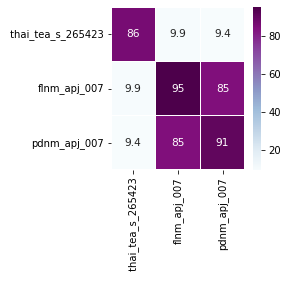

--------------------------------------
Saving file: thai_tea_similarity
Saving to path: /content/drive/My Drive/bt101_projects/project_coffee_succeed/outputs/develope_v_2_5_2/thai_tea_similarity.png
Save file: thai_tea_similarity to PNG format done

----------------------------------------------------------------------------

10. Merge and join datasets into a dataframe for future usage 

Begin to merge and join datasets
Considering type: thai_tea
Merging and joining datasets in class:  thai_tea_s_265423  ===>  dataframe of type: thai_tea
Merging and joining datasets in class: flnm_apj_007  ===>  dataframe of type: thai_tea
Merging and joining datasets in class: pdnm_apj_007  ===>  dataframe of type: thai_tea
Merge and join dataframe of type: thai_tea done
--------------------------------------
Saving file: thai_tea_merged_dataframe
Saving to path: /content/drive/My Drive/bt101_projects/project_coffee_succeed/outputs/develope_v_2_5_2/thai_tea_merged_dataframe.csv
Save file: thai_tea_me

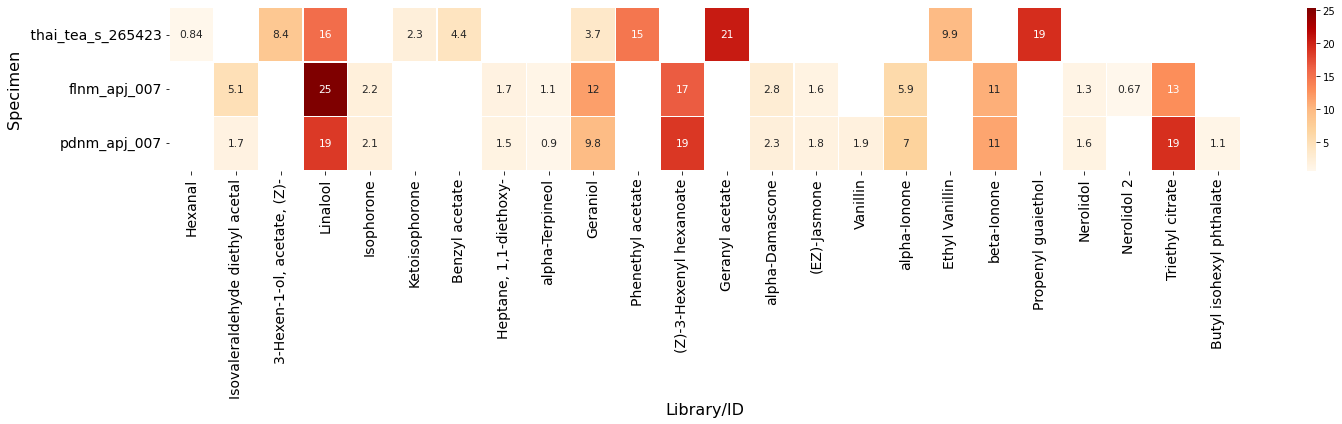


Current figure configurations:
 figure_size:  (24, 3)
 fontsize:  16
 colormap:  OrRd

Please insert pass or customization: 


KeyboardInterrupt: ignored

In [ ]:
main(paths=paths,
     data_dict=data_dict,
     reference_dict=reference_dict,
     replacing_dict=replacing_dict,
     contamination_list=contamination_list,
     options=options)